In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils
import cf_xarray as cfxr

from sklearn.linear_model import LinearRegression
import scipy.signal as signal
from scipy import stats
from datetime import timedelta

import seaborn as sns
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo
from matplotlib.gridspec import GridSpec

In [2]:
dask.config.set(**{'array.slicing.split_large_chunks': True})

## Import G

In [3]:
G_ds = xr.open_dataset('Outputs/G_ds.nc4')['__xarray_dataarray_variable__']
G_mean_ds = xr.open_dataset('Outputs/G_mean_ds.nc4')['__xarray_dataarray_variable__']

G_CDR_ds = xr.open_dataset('Outputs/G_cdr_ds.nc4')['__xarray_dataarray_variable__']
G_CDR_mean_ds = xr.open_dataset('Outputs/G_cdr_mean_ds.nc4')['__xarray_dataarray_variable__']

In [4]:
G_ds = xr.concat([G_ds, -G_CDR_ds], pd.Index(['pulse','cdr'], name = 'pulse_type'))
G_mean_ds = xr.concat([G_mean_ds, -G_CDR_mean_ds], pd.Index(['pulse','cdr'], name = 'pulse_type'))

In [5]:
G_ds.name = 'G[tas]'
G_mean_ds.name = 'G[tas]'

In [6]:
G_ds = G_ds.rename({'year':'s'})
G_mean_ds = G_mean_ds.rename({'year':'s'})

## Notes:

GFDL: 1pct and esm pi-control start from year 0001

UKESM1: 1pct starts in 1850 and pi-control starts in 1960, move 1pct to start in 1960

MIROC: both start from 1850

NORESM2: 1pct from 0001 pi-control from 1600-- move 1pct to 1600

ACCESS: 1pct and pi-control from 0101

CANESM5_r1p2: 1pct 1850, pi-control 5550, move 1pct to 5550


In [7]:
model_run_pulse_dict = utils.model_run_pulse_dict
model_run_1pct_dict = utils.model_run_1pct_dict
model_run_control_dict = utils.model_run_picontrol_dict
model_run_cdr_pulse_dict = utils.model_run_cdr_pulse_dict
model_run_1pct1000gtc_dict = utils.model_run_1pct_1000gtc_dict


In [8]:
model_color = utils.model_color
type_color = utils.type_color

In [9]:
#define our output grid size

ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0, 360, 1)),
        "lat_b": (["lat_b"], np.arange(-90.,91.,1.0)),
        "lon_b":(["lon_b"], np.arange(.5, 361.5, 1.0))
    }
)

In [10]:
A = utils.find_area(ds_out)

In [11]:
tas_co2_1pct1000gtc = {}
tas_co2_pictrl = {}
tas_1pct = {}

for m in model_run_1pct_dict.keys():
    print(m)
    print('tas')
    tas_1pct[m] = xr.open_mfdataset(f'cmip6_data/tas_Amon_{model_run_1pct_dict[m]}',  use_cftime=True) #kg/m2/s
    lat_corners = cfxr.bounds_to_vertices(tas_1pct[m].isel(time = 0)['lat_bnds'], "bnds", order=None)
    lon_corners = cfxr.bounds_to_vertices(tas_1pct[m].isel(time = 0)['lon_bnds'], "bnds", order=None)
    tas_1pct[m] = tas_1pct[m].assign(lon_b=lon_corners, lat_b=lat_corners)
    tas_1pct[m] = utils._regrid_ds(tas_1pct[m], ds_out)
    
    
for m in model_run_1pct1000gtc_dict.keys():
    print(m)
    print('tas')
    tas_co2_1pct1000gtc[m] = xr.open_mfdataset(f'cmip6_data/tas_Amon_{model_run_1pct1000gtc_dict[m]}',  use_cftime=True) #kg/m2/s
    lat_corners = cfxr.bounds_to_vertices(tas_co2_1pct1000gtc[m].isel(time = 0)['lat_bnds'], "bnds", order=None)
    lon_corners = cfxr.bounds_to_vertices(tas_co2_1pct1000gtc[m].isel(time = 0)['lon_bnds'], "bnds", order=None)
    tas_co2_1pct1000gtc[m] = tas_co2_1pct1000gtc[m].assign(lon_b=lon_corners, lat_b=lat_corners)
    tas_co2_1pct1000gtc[m] = utils._regrid_ds(tas_co2_1pct1000gtc[m], ds_out)


UKESM1_r1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r3
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r4
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MIROC
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NORESM2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


ACCESS
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


GFDL
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r2p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r3p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r2p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r3p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r3
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r4
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MIROC
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NORESM2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


ACCESS
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r2p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r3p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [12]:
for m in tas_co2_1pct1000gtc.keys():
    tas_co2_1pct1000gtc[m] = xr.concat([tas_1pct[m].loc[dict(time = slice(tas_1pct[m]['time'].min(), tas_co2_1pct1000gtc[m]['time'].min()-timedelta(30)))] , 
                                        tas_co2_1pct1000gtc[m]],
                 dim = 'time')


In [13]:
for m in model_run_control_dict.keys():
    print(m)
    print('tas')
    tas_co2_pictrl[m] = xr.open_mfdataset(f'cmip6_data/tas_Amon_{model_run_control_dict[m]}',  use_cftime=True) #kg/m2/s
    lat_corners = cfxr.bounds_to_vertices(tas_co2_pictrl[m].isel(time = 0)['lat_bnds'], "bnds", order=None)
    lon_corners = cfxr.bounds_to_vertices(tas_co2_pictrl[m].isel(time = 0)['lon_bnds'], "bnds", order=None)
    tas_co2_pictrl[m] = tas_co2_pictrl[m].assign(lon_b=lon_corners, lat_b=lat_corners)
    tas_co2_pictrl[m] = utils._regrid_ds(tas_co2_pictrl[m], ds_out)

## fix the times so that they line up according to the notes above
m = 'NORESM2'
tas_co2_pictrl[m]['time'] = tas_co2_pictrl[m]['time'] -timedelta(365*1599)

m = 'UKESM1_r1'
tas_co2_pictrl[m]['time'] = tas_co2_pictrl[m]['time'] - timedelta(360*110)

m = 'CANESM5_r1p2'
tas_co2_pictrl[m]['time'] = tas_co2_pictrl[m]['time']- timedelta(365*3700)

m = 'CANESM5_r1p1'
tas_co2_pictrl[m]['time'] = tas_co2_pictrl[m]['time']- timedelta(365*3351)

UKESM1_r1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MIROC
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NORESM2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


ACCESS
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


GFDL
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [14]:
dif_1000gtc = {}
for m1 in model_run_1pct1000gtc_dict.keys():
    print(m1)
    if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
        m2 = 'UKESM1_r1'
    elif m1 == 'CANESM5_r1p2' or m1 == 'CANESM5_r2p2' or m1 == 'CANESM5_r3p2' or m1 == 'CANESM5_r4p2' or m1 == 'CANESM5_r5p2':
         m2 = 'CANESM5_r1p2'
    else:
        m2 = m1
    print(m1, m2)
    
    dif_1000gtc[m1] = tas_co2_1pct1000gtc[m1] - tas_co2_pictrl[m2]
    
    if len(dif_1000gtc[m1]['time']) > 3000:  #hack to get the time stamping to work, should find better fix
        periods = 3000
    else:
        periods = len(dif_1000gtc[m1]['time'])
        
    times = pd.date_range('2000', periods= periods, freq='MS')
    weights = times.shift(1, 'MS') - times
    weights = xr.DataArray(weights, [('time', dif_1000gtc[m1]['time'][:periods].values)]).astype('float')
    dif_1000gtc[m1] =  (dif_1000gtc[m1] * weights).groupby('time.year').sum('time')/weights.groupby('time.year').sum('time')

    dif_1000gtc[m1]['year'] = range(len(dif_1000gtc[m1]['year']))

UKESM1_r1
UKESM1_r1 UKESM1_r1
UKESM1_r2
UKESM1_r2 UKESM1_r1
UKESM1_r3
UKESM1_r3 UKESM1_r1
UKESM1_r4
UKESM1_r4 UKESM1_r1
MIROC
MIROC MIROC
NORESM2
NORESM2 NORESM2
ACCESS
ACCESS ACCESS
CANESM5_r1p2
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r2p2
CANESM5_r2p2 CANESM5_r1p2
CANESM5_r3p2
CANESM5_r3p2 CANESM5_r1p2


In [15]:
dif_1pct = {}
for m1 in model_run_1pct_dict.keys():
    if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
        m2 = 'UKESM1_r1'
    elif m1 == 'CANESM5_r1p1' or m1 == 'CANESM5_r2p1' or m1 == 'CANESM5_r3p1':
         m2 = 'CANESM5_r1p1'
    elif m1 == 'CANESM5_r1p2' or m1 == 'CANESM5_r2p2' or m1 == 'CANESM5_r3p2':
         m2 = 'CANESM5_r1p2'
    else:
        m2 = m1
    print(m1, m2)
    
    
    dif_1pct[m1] = tas_1pct[m1] - tas_co2_pictrl[m2]
    
    if len(dif_1pct[m1]['time']) > 3000:  #hack to get the time stamping to work, should find better fix
        periods = 3000
    else:
        periods = len(dif_1pct[m1]['time'])
        
    times = pd.date_range('2000', periods= periods, freq='MS')
    weights = times.shift(1, 'MS') - times
    weights = xr.DataArray(weights, [('time', dif_1pct[m1]['time'][:periods].values)]).astype('float')
    dif_1pct[m1] =  (dif_1pct[m1] * weights).groupby('time.year').sum('time')/weights.groupby('time.year').sum('time')

    dif_1pct[m1]['year'] = range(len(dif_1pct[m1]['year']))

UKESM1_r1 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r4 UKESM1_r1
MIROC MIROC
NORESM2 NORESM2
ACCESS ACCESS
GFDL GFDL
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r2p2 CANESM5_r1p2
CANESM5_r3p2 CANESM5_r1p2
CANESM5_r1p1 CANESM5_r1p1
CANESM5_r2p1 CANESM5_r1p1
CANESM5_r3p1 CANESM5_r1p1


In [16]:
for m in dif_1pct.keys():
    dif_1pct[m] = dif_1pct[m].drop('height')
for m in dif_1000gtc.keys():
    dif_1000gtc[m] = dif_1000gtc[m].drop('height')

In [17]:
#get rid of height and limit the time to the length of the GF
for m1 in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2',
       'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2']:
    
    for t in ['pulse','cdr']:
        if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
            m2 = 'UKESM1_r1'
        elif m1 == 'CANESM5_r1p1' or m1 == 'CANESM5_r2p1' or m1 == 'CANESM5_r3p1':
             m2 = 'CANESM5_r1p1'
        elif m1 == 'CANESM5_r1p2' or m1 == 'CANESM5_r2p2' or m1 == 'CANESM5_r3p2':
             m2 = 'CANESM5_r1p2'
        else:
            m2 = m1
    
        
        length = len(G_ds.sel(model = m2, pulse_type = t).dropna(dim = 's')['s'])
        dif_1pct[m] = dif_1pct[m].sel(year = slice(0,length))


In [18]:
for m1 in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2',
       'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2']:
    
    for t in ['pulse','cdr']:
        if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
            m2 = 'UKESM1_r1'
        elif m1 == 'CANESM5_r1p2' or m1 == 'CANESM5_r2p2' or m1 == 'CANESM5_r3p2' or m1 == 'CANESM5_r4p2' or m1 == 'CANESM5_r5p2':
             m2 = 'CANESM5_r1p2'
        else:
            m2 = m1    
        
        length = len(G_ds.sel(model = m2, pulse_type = t).dropna(dim = 's')['s'])
        dif_1000gtc[m] = dif_1000gtc[m].sel(year = slice(0,10))

In [19]:
ds_dif_1pct = xr.concat([dif_1pct[m] for m in dif_1pct.keys()], pd.Index([m for m in dif_1pct.keys()], name='model'), coords='minimal')


In [20]:
ds_dif_1000gtc = xr.concat([dif_1000gtc[m] for m in dif_1000gtc.keys()], pd.Index([m for m in dif_1000gtc.keys()], name='model'), coords='minimal')


In [21]:
ds_dif = xr.concat([ds_dif_1000gtc, ds_dif_1pct], pd.Index(['1000gtc','1pct'], name='experiment'), coords='minimal')


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/array/core.py:4697: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/array/core.py:4697: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(


In [22]:
ds_dif = ds_dif.rename({'year':'s'})

## Emissions profile

In [23]:
emis_profile_1pct = xr.open_dataset(f'1pct_emis_profile_full.nc4')
emis_profile_1pct = emis_profile_1pct.rename({'__xarray_dataarray_variable__':'emis'})

emis_profile_1000gtc =  xr.open_dataset(f'1pct1000gtc_emis_profile_full.nc4')
emis_profile_1000gtc = emis_profile_1000gtc.rename({'__xarray_dataarray_variable__':'emis'})

In [24]:
emis_profile = xr.concat([emis_profile_1000gtc, emis_profile_1pct], pd.Index(['1000gtc','1pct'], name='experiment'), coords='minimal')


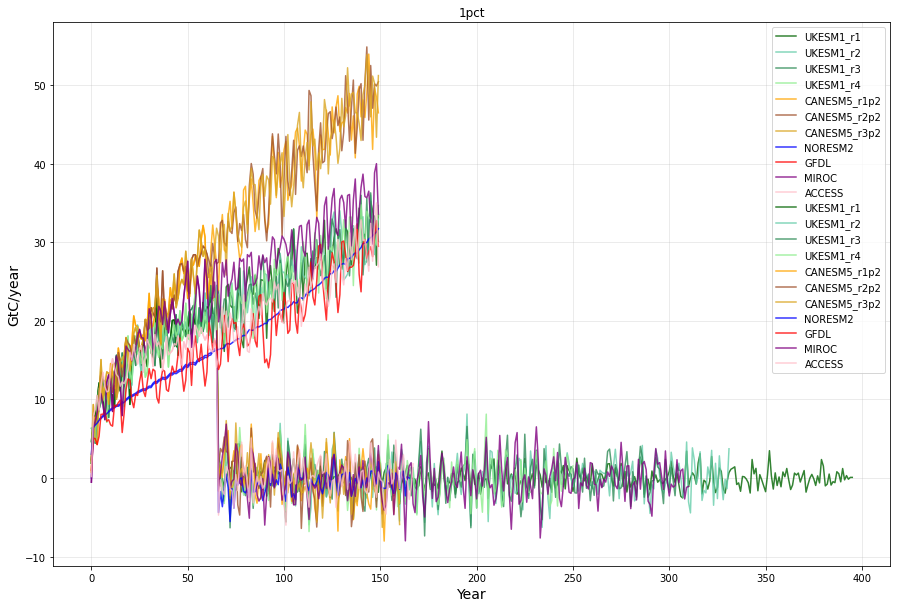

In [25]:
fig, ax = plt.subplots(figsize = [15,10])
for exp in ['1000gtc','1pct']:
    for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'CANESM5_r1p2', 'CANESM5_r2p2', 'CANESM5_r3p2', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
        plt.plot(emis_profile.sel(model = m, experiment = exp)['emis'], alpha = .8, label = f'{m}', color = model_color[m])
    #plt.plot(emis_profile.mean(dim = 'model')['emis'], color = 'k', label = f'Model Mean')
    plt.legend()
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('GtC/year', fontsize = 14)
    plt.title(exp)
    plt.grid(alpha = .3)
plt.savefig('figures/1pct_increase/emis.png', dpi = 350, bbox_inches = 'tight')


## Define our Model Weights

In [25]:
#define our weights for models (grouping UKESM and CANESM realizations)
model_weights = {'UKESM1_r1': 0.25, 'UKESM1_r2': 0.25, 'UKESM1_r3': 0.25, 'UKESM1_r4': 0.25, 'NORESM2': 1, 'GFDL': 1,
       'MIROC': 1, 'ACCESS': 1,  'CANESM5_r2p2':1/3, 'CANESM5_r1p2':1/3, 'CANESM5_r3p2':1/3}
model_weights = xr.DataArray(
    data=list(model_weights.values()),
    dims=["model"],
    coords=dict(
        model=(["model"], list(model_weights.keys()))
    ),
    attrs=dict(
        description="weights for models"
    ),
)

In [26]:
#define our weights for models (grouping UKESM and CANESM realizations)
onepct_model_weights = {'UKESM1_r1': 0.25, 'UKESM1_r2': 0.25, 'UKESM1_r3': 0.25, 'UKESM1_r4': 0.25, 'NORESM2': 1, 'GFDL': 1,
       'MIROC': 1, 'CANESM5_r3p1':1/6, 'ACCESS':1, 'CANESM5_r2p2':1/6, 'CANESM5_r2p1':1/6,
       'CANESM5_r1p2':1/6, 'CANESM5_r1p1':1/6, 'CANESM5_r3p2':1/6}
onepct_model_weights = xr.DataArray(
    data=list(onepct_model_weights.values()),
    dims=["model"],
    coords=dict(
        model=(["model"], list(onepct_model_weights.keys()))
    ),
    attrs=dict(
        description="weights for models"
    ),
)

## Global Mean Analysis

In [27]:
%%time
GF = G_ds.weighted(A).mean(dim = ['lat','lon'])

conv_mean = {}
for exp in ['1000gtc','1pct']:
    conv_mean[exp] = {}
    for m1 in ['UKESM1_r1','UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'ACCESS',
       'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'CANESM5_r3p2']:
        conv_mean[exp][m1] = {}
        for t in ['pulse','cdr']:
            if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
                m2 = 'UKESM1_r1'
            else:
                m2 = m1
            conv_mean[exp][m1][t] = signal.convolve( np.array(GF.sel(model = m2, pulse_type = t).dropna(dim = 's')), np.array(emis_profile.sel(model = m1, experiment = exp)['emis']),'full')
            conv_mean[exp][m1][t] = utils.np_to_xr_mean(conv_mean[exp][m1][t], GF.sel(model = m2, pulse_type = t), emis_profile.sel(model = m1, experiment = exp))
            length = len(G_ds.weighted(A).mean(dim = ['lat','lon']).dropna(dim = 's')['s'])
            conv_mean[exp][m1][t] = conv_mean[exp][m1][t][:length]


CPU times: user 1min 11s, sys: 28.1 s, total: 1min 39s
Wall time: 1min 39s


for exp in ['1000gtc','1pct']:
    for m1 in conv_mean[exp].keys():
        for t in ['pulse','cdr']:
            if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
                m2 = 'UKESM1_r1'
            else:
                m2 = m1
            

In [28]:
#convert to dataset

conv_dict = {}
for exp in conv_mean.keys():
    conv_dict[exp] = {}
    for m in conv_mean[exp].keys():
        conv_dict[exp][m] = xr.concat([conv_mean[exp][m][t] for t in conv_mean[exp][m].keys()], pd.Index([t for t in conv_mean[exp][m].keys()], name='pulse_type'), coords='minimal')
for exp in conv_mean.keys():
    conv_dict[exp] = xr.concat([conv_dict[exp][m] for m in conv_mean[exp].keys()], pd.Index([m for m in conv_mean[exp].keys()], name='model'), coords='minimal')
conv_mean_ds = xr.concat([conv_dict[exp] for exp in conv_dict.keys()], pd.Index([exp for exp in conv_dict.keys()], name='experiment'), coords='minimal')


for exp in ['1000gtc','1pct']:
    for m1 in ds_dif.keys():
        for t in ['pulse','cdr']:
            if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
                m2 = 'UKESM1_r1'
            else:
                m2 = m1
            length = len(G_ds.sel(model = m2, pulse_type = t).dropna(dim = 's')['s'])
            #length = len(G_ds.weighted(A).mean(dim = ['lat','lon']).dropna(dim = 's')['s'])
            ds_dif.sel(model = m1, experiment = exp) = ds_dif.sel(model = m1, experiment = exp).where(ds_dif.sel(model = m1, experiment = exp)['s'] < length, drop = True)

## TCRE

In [29]:

def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)


data = {'mean': conv_mean_ds.sel(experiment = '1000gtc').mean(dim = ['pulse_type']).sel(s = slice(60,80)).mean(dim = ['s']).values,
        'model': conv_mean_ds.model.values,
        'count': [3, 3, 3, 3, 12, 12, 12, 12, 4, 4, 4]}
df_1000gtc_emulator = pd.DataFrame(data)
df_1000gtc_emulator = reindex_df(df_1000gtc_emulator, weight_col = 'count')

data = {'mean': conv_mean_ds.sel(experiment = '1pct').mean(dim = ['pulse_type']).sel(s = slice(60,80)).mean(dim = ['s']).values,
        'model': conv_mean_ds.model.values,
        'count': [3, 3, 3, 3, 12, 12, 12, 12, 4, 4, 4]}
df_1pct_emulator = pd.DataFrame(data)
df_1pct_emulator = reindex_df(df_1pct_emulator, weight_col = 'count')


data = {'mean': ds_dif.where(ds_dif['model'].isin(model_weights.model.values), drop = True).sel(experiment = '1pct').sel(s = slice(60,80)).weighted(A).mean(dim = ['s', 'lon','lat'])['tas'].values,
        'model': ds_dif.where(ds_dif['model'].isin(model_weights.model.values), drop = True).sel(experiment = '1pct').model.values,
        'count': [3, 3, 3, 3, 12, 12, 12, 12, 4, 4, 4]}

df_1pct_model = pd.DataFrame(data)
df_1pct_model = reindex_df(df_1pct_model, weight_col = 'count')


#######ZEC############

data = {'mean': (conv_mean_ds.sel(experiment = '1000gtc').where(conv_mean_ds['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).mean(dim = 'pulse_type').sel(
                                                                s = slice(80-10, 80+10)).mean(dim = 's').weighted(A).mean(dim = ['lat','lon']) - 
                    conv_mean_ds.sel(experiment = '1000gtc').where(conv_mean_ds['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).mean(dim = 'pulse_type').sel(s = 65).weighted(A).mean(dim = ['lat','lon'])).values,
        'model': conv_mean_ds.where(conv_mean_ds['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).model.values,
        'count': [3, 3, 3, 3, 12, 12, 12, 4, 4, 4]}

df_zec_emulator_model = pd.DataFrame(data)
df_zec_emulator_model = reindex_df(df_zec_emulator_model, weight_col = 'count')




data = {'mean': (ds_dif.where(ds_dif['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).sel(experiment = '1000gtc').sel(
                                                                s = slice(80-10, 80+10)).mean(dim = 's').weighted(A).mean(dim = ['lat','lon']) - 
                    ds_dif.where(ds_dif['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).sel(experiment = '1000gtc').sel(s = 65).weighted(A).mean(dim = ['lat','lon']))['tas'].values,
        
        'model': ds_dif.where(ds_dif['model'].isin(list(model_run_1pct1000gtc_dict.keys())), drop = True).sel(experiment = '1000gtc').model.values,
        'count': [3, 3, 3, 3, 12, 12, 12, 4, 4, 4]}

df_zec_cmip_model = pd.DataFrame(data)
df_zec_cmip_model = reindex_df(df_zec_cmip_model, weight_col = 'count')

## Figure 1

In [30]:
type_color = {'model_1pct': 'darkcyan',
              'model_1000gtc': 'darkcyan',
             'emulator_1pct': 'maroon',
              'emulator_1000gtc':'maroon'}

Text(0, 0.5, '$\\Delta$T ($\\degree$C)')

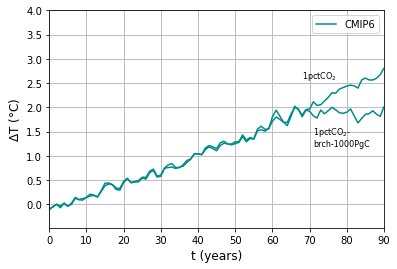

In [35]:
fig, ax2 = plt.subplots()

###Plot the 1pct model runs
ax2.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(model_weights).mean(dim = 'model').weighted(A).mean(dim = ['lat','lon']).sel(experiment = '1pct')['tas'], 
         label = 'CMIP6', color = type_color['model_1pct'])
ax2.plot(np.arange(0,len(ds_dif['s'])), ds_dif.where(ds_dif.model.isin(list(model_run_1pct1000gtc_dict.keys()))).weighted(model_weights).mean(dim = 'model').weighted(A).mean(dim = ['lat','lon']).sel(experiment = '1000gtc')['tas'], 
         color = type_color['model_1000gtc'])
#ax2.plot(conv_mean_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type']).sel(experiment = '1pct'), label = f'ESGR', color = type_color['emulator_1pct'], linestyle = '--')
#ax2.plot(conv_mean_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type']).sel(experiment = '1000gtc'), color = type_color['emulator_1000gtc'], linestyle = '--')
ax2.text(71, 1.2, '1pctCO$_2$-\nbrch-1000PgC', fontsize = 8)
ax2.text(68, 2.6, '1pctCO$_2$', fontsize = 8)
ax2.grid()

#ax2.axvspan(60, 80, alpha=0.2, color='grey')
#ax2.axvspan(70, 90, alpha=0.2, color='khaki')
ax2.legend()
ax2.set_xlim(0,90)
ax2.set_ylim(None, 4)
ax2.set_xlabel('t (years)', fontsize = 12)
ax2.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 12)


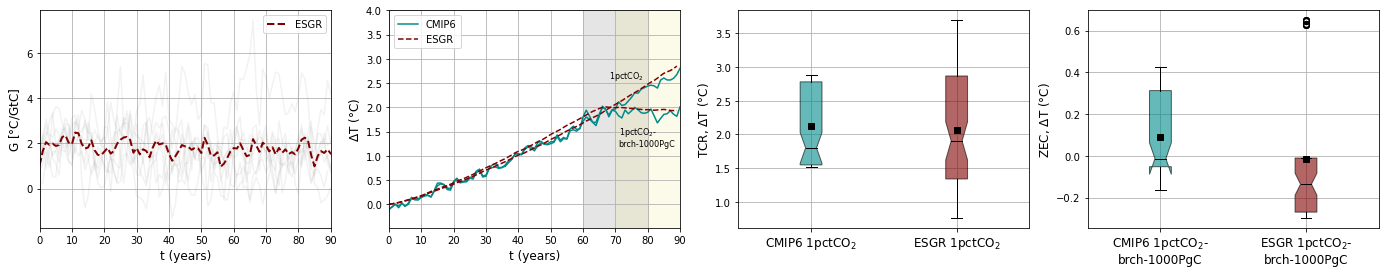

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = [24,4])
GtC_per_TtC = 1e3
####Plot the GF
for m in G_ds.model:
    (G_ds.weighted(A).mean(dim = ['lat','lon']).sel(model = m).mean(dim = 'pulse_type')*GtC_per_TtC).plot(ax = ax1, color = 'grey', alpha = .1)
ax1.set_title('Annual Mean', fontsize = 16)
ax1.set_xlim(G_ds.s.min(), G_ds.s[90].values)

(G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = ['model', 'pulse_type'])*GtC_per_TtC).plot(ax = ax1, label = 'ESGR', color = type_color['emulator_1pct'], linewidth = 2, linestyle = '--')
ax1.set_ylabel('G [$\degree$C/GtC]', fontsize = 12)
ax1.grid()
ax1.set_xlabel('t (years)', fontsize = 12)
ax1.legend()


###Plot the 1pct model runs
ax2.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(model_weights).mean(dim = 'model').weighted(A).mean(dim = ['lat','lon']).sel(experiment = '1pct')['tas'], 
         label = 'CMIP6', color = type_color['model_1pct'])
ax2.plot(np.arange(0,len(ds_dif['s'])), ds_dif.where(ds_dif.model.isin(list(model_run_1pct1000gtc_dict.keys()))).weighted(model_weights).mean(dim = 'model').weighted(A).mean(dim = ['lat','lon']).sel(experiment = '1000gtc')['tas'], 
         color = type_color['model_1000gtc'])
ax2.plot(conv_mean_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type']).sel(experiment = '1pct'), label = f'ESGR', color = type_color['emulator_1pct'], linestyle = '--')
ax2.plot(conv_mean_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type']).sel(experiment = '1000gtc'), color = type_color['emulator_1000gtc'], linestyle = '--')
ax2.text(71, 1.2, '1pctCO$_2$-\nbrch-1000PgC', fontsize = 8)
ax2.text(68, 2.6, '1pctCO$_2$', fontsize = 8)
ax2.grid()

ax2.axvspan(60, 80, alpha=0.2, color='grey')
ax2.axvspan(70, 90, alpha=0.2, color='khaki')
ax2.legend()
ax2.set_xlim(0,90)
ax2.set_ylim(None, 4)
ax2.set_xlabel('t (years)', fontsize = 12)
ax2.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 12)


####Plot the TCRE comparison
x = ['CMIP6 1pctCO$_2$', 'ESGR 1pctCO$_2$']#, '10 Year Rolling\nMean Emulator']
y = [df_1pct_model['mean'],
    df_1pct_emulator['mean']]#,
colors = [type_color['model_1pct'], type_color['emulator_1pct']]
box = ax3.boxplot(y, showmeans= True, notch = True, patch_artist=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
for median in box['medians']:
    median.set_color('black')
ax3.grid()
ax3.set_ylabel('TCR, $\Delta$T ($\degree$C)', fontsize = 12)
ax3.set_xticklabels(x, fontsize = 12)


####Plot the ZEC comparison
x = ['CMIP6 1pctCO$_2$-\nbrch-1000PgC', 'ESGR 1pctCO$_2$-\nbrch-1000PgC']#, '10 Year Rolling\nMean Emulator']
y = [df_zec_cmip_model['mean'].dropna(),
    df_zec_emulator_model['mean'].dropna()]
    
colors = [type_color['model_1pct'], type_color['emulator_1pct']]
box = ax4.boxplot(y, showmeans= True, notch = True, patch_artist=True, meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
for median in box['medians']:
    median.set_color('black')
ax4.grid()
ax4.set_ylabel('ZEC, $\Delta$T ($\degree$C)', fontsize = 12)
ax4.set_xticklabels(x, fontsize = 12)
plt.savefig('figures/paper/figure1_GF_1pct_TCR.png', bbox_inches = 'tight', dpi = 300)

## Spatial Analysis

In [29]:
%%time

GF = G_ds

conv = {}
for exp in ['1000gtc','1pct']:
    print(exp)
    conv[exp] = {}
    if exp == '1000gtc':
        model_list = ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2',]
    elif exp == '1pct':
        model_list = ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2',]
    for m1 in model_list:
        conv[exp][m1] = {}
        for t in ['pulse','cdr']:
            if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
                m2 = 'UKESM1_r1'
            else:
                m2 = m1
            print(m1, m2)
            conv[exp][m1][t] = signal.convolve(np.array(GF.sel(model = m2, pulse_type = t).dropna(dim = 's')), 
                                               np.array(emis_profile.sel(model = m1, experiment = exp)['emis'])[~np.isnan(np.array(emis_profile.sel(model = m1, experiment = exp)['emis']))][..., None, None],
                                               'full')
            conv[exp][m1][t] = utils.np_to_xr(conv[exp][m1][t], GF.sel(model = m2, pulse_type = t), emis_profile.sel(model = m1, experiment = exp))


1000gtc
UKESM1_r1 UKESM1_r1
UKESM1_r1 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r4 UKESM1_r1
UKESM1_r4 UKESM1_r1
NORESM2 NORESM2
NORESM2 NORESM2
MIROC MIROC
MIROC MIROC
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r2p2 CANESM5_r2p2
CANESM5_r2p2 CANESM5_r2p2
ACCESS ACCESS
ACCESS ACCESS
CANESM5_r3p2 CANESM5_r3p2
CANESM5_r3p2 CANESM5_r3p2
1pct
UKESM1_r1 UKESM1_r1
UKESM1_r1 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r4 UKESM1_r1
UKESM1_r4 UKESM1_r1
NORESM2 NORESM2
NORESM2 NORESM2
GFDL GFDL
GFDL GFDL
MIROC MIROC
MIROC MIROC
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r2p2 CANESM5_r2p2
CANESM5_r2p2 CANESM5_r2p2
ACCESS ACCESS
ACCESS ACCESS
CANESM5_r3p2 CANESM5_r3p2
CANESM5_r3p2 CANESM5_r3p2
CPU times: user 20.2 s, sys: 12.9 s, total: 33.1 s
Wall time: 33.2 s


In [30]:
#convert to dataset

conv_dict = {}
for exp in conv.keys():
    conv_dict[exp] = {}
    for m in conv[exp].keys():
        conv_dict[exp][m] = xr.concat([conv[exp][m][t] for t in conv[exp][m].keys()], pd.Index([t for t in conv[exp][m].keys()], name='pulse_type'), coords='minimal')
for exp in conv.keys():
    conv_dict[exp] = xr.concat([conv_dict[exp][m] for m in conv[exp].keys()], pd.Index([m for m in conv[exp].keys()], name='model'), coords='minimal')
conv_ds = xr.concat([conv_dict[exp] for exp in conv_dict.keys()], pd.Index([exp for exp in conv_dict.keys()], name='experiment'), coords='minimal')


## Hatched plots

Hatching where the model mean convolution is greater than x of a standard deviation from the weighted model mean

In [31]:
num_std = 1

In [32]:
plus_std = ds_dif['tas'].weighted(model_weights).mean(dim = 'model') + num_std*ds_dif['tas'].weighted(model_weights).std(dim = 'model')
minus_std = ds_dif['tas'].weighted(model_weights).mean(dim = 'model') - num_std*ds_dif['tas'].weighted(model_weights).std(dim = 'model')
ds_compare = conv_ds.weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type')

## Figure 2

In [33]:
hatching = ((ds_compare > minus_std) & (ds_compare < plus_std))


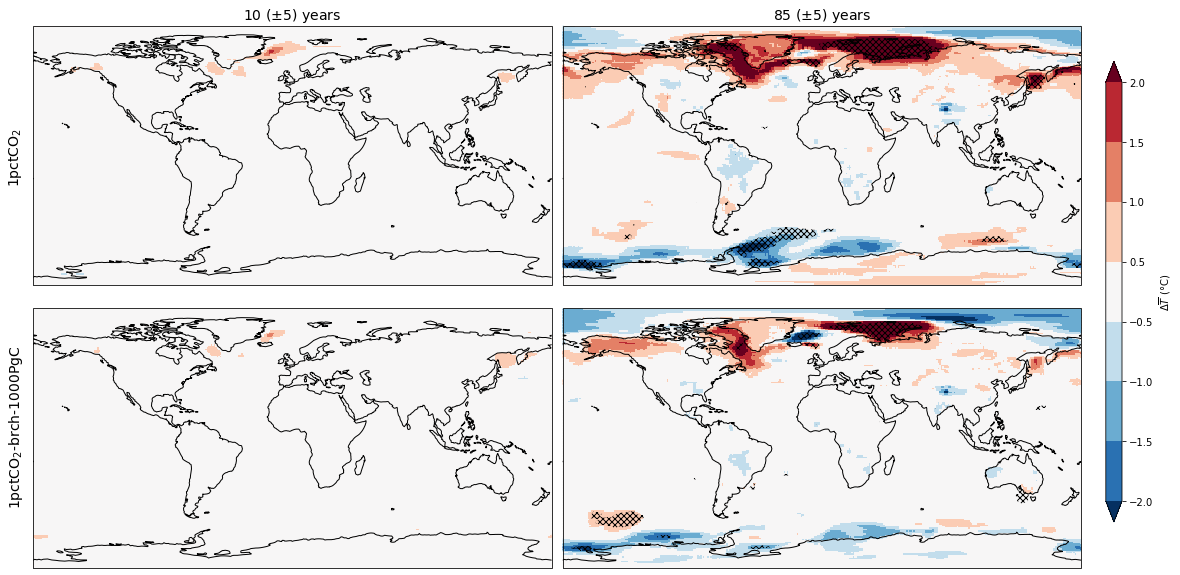

In [45]:
cmap = mpl.cm.RdBu_r
levels = [-2,-1.5,-1,-0.5,0.5,1,1.5,2.0]
vmin = -2
vmax = 2
yr_dif = 5
fig, ((ax1, ax2),(ax3, ax4))= plt.subplots(2, 2, figsize = [15,8], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout = True)

##########1pct exp##################
##contours of convolution-1pct difference
for t, ax in zip([10,85],[ax1,ax2]):
    if ax == ax1:
        add_cbar = False
    elif ax == ax2:
        add_cbar = True
    (conv_ds -  ds_dif['tas']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1pct').plot(ax = ax, 
                                                                                                                  cmap = cmap, levels = levels, extend = 'both', 
                                                                                                                  add_colorbar = False,     
                                                                                                                  transform = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(f'{t} ($\pm 5$) years', fontsize = 14)

##hatching for locations where convolution falls within 1std
cs = hatching.sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1pct').plot.contourf(ax = ax2, hatches = ['xxxx', ''], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)
for i, collection in enumerate(cs.collections):
    collection.set_edgecolor('black')
for collection in cs.collections:
    collection.set_linewidth(0.)
ax2.set_title('85 ($\pm 5$) years', fontsize = 14)

############ 1000gtc exp##############
for t, ax in zip([10,85],[ax3,ax4]):
    if ax == ax3:
        add_cbar = False
    elif ax == ax4:
        add_cbar = True
    axp = (conv_ds -  ds_dif['tas']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1000gtc').plot(ax = ax, 
                                                                                                                  cmap = cmap, levels = levels, extend = 'both', 
                                                                                                                  add_colorbar = False,     
                                                                                                                  transform = ccrs.PlateCarree())

    ax.coastlines()
    
##hatching for locations where convolution falls within 1std
cs = hatching.sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1000gtc').plot.contourf(ax = ax4, hatches = ['xxxx', ''], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)
for i, collection in enumerate(cs.collections):
    collection.set_edgecolor('black')
for collection in cs.collections:
    collection.set_linewidth(0.)

cbaxes = fig.add_axes([1.02,.1,.015,.8])
cb = plt.colorbar(axp, cax = cbaxes)
cb.set_label('$\Delta \overline{T}$ ($\degree$C)')

ax1.text(-0.05,.4,'1pctCO$_2$', rotation = 'vertical', fontsize = 14, transform=ax1.transAxes)
ax3.text(-0.05,.25,'1pctCO$_2$-brch-1000PgC', rotation = 'vertical', fontsize = 14, transform=ax3.transAxes)
ax3.set_title(None)
ax4.set_title(None)
plt.savefig(f'figures/paper/figure2_10_85_difference_1std.png', bbox_inches = 'tight', dpi = 300)

/tmp/ipykernel_17030/4074746491.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.3)


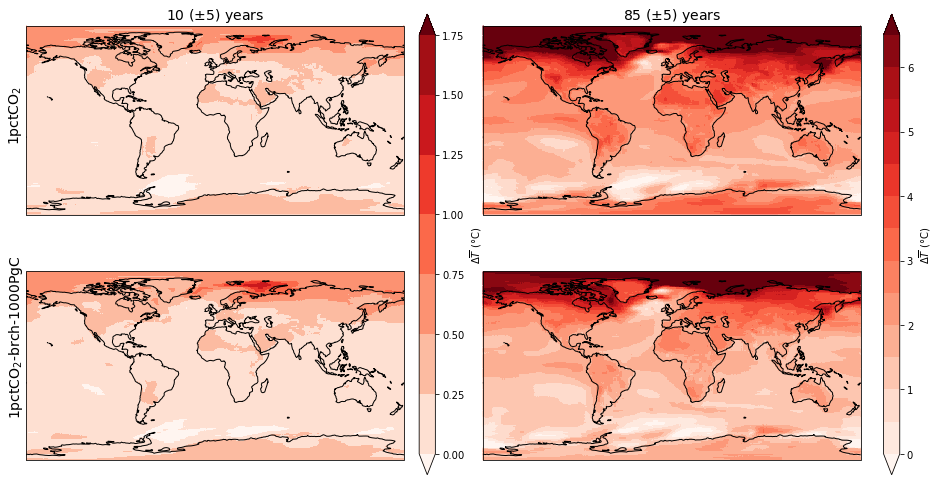

In [45]:
cmap = mpl.cm.Reds
levels = {10:np.arange(0,2,0.25) , 85:np.arange(0,7,0.5)}
vmin = -2
vmax = 2
yr_dif = 5
fig, ((ax1, ax2),(ax3, ax4))= plt.subplots(2, 2, figsize = [15,8], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout = True)
plt.subplots_adjust(hspace=0.3)

##########1pct exp##################
##contours of convolution-1pct difference
for t, ax in zip([10,85],[ax1,ax2]):
    if ax == ax1:
        add_cbar = False
    elif ax == ax2:
        add_cbar = True
    axp1 = (conv_ds).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1pct').plot(ax = ax, 
                                                                                                                  cmap = cmap, levels = levels[t], extend = 'both', 
                                                                                                                  add_colorbar = False,     
                                                                                                                  transform = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(f'{t} ($\pm 5$) years', fontsize = 14)

    if t == 10:
        cbaxes = fig.add_axes([.49,.1,.015,.8])
        cb = plt.colorbar(axp1, cax = cbaxes)
        cb.set_label('$\Delta \overline{T}$ ($\degree$C)')

# ##hatching for locations where convolution falls within 1std
# cs = hatching.sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1pct').plot.contourf(ax = ax2, hatches = ['xxxx', ''], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)
# for i, collection in enumerate(cs.collections):
#     collection.set_edgecolor('white')
# for collection in cs.collections:
#     collection.set_linewidth(0.)
ax2.set_title('85 ($\pm 5$) years', fontsize = 14)


############ 1000gtc exp##############
for t, ax in zip([10,85],[ax3,ax4]):
    if ax == ax3:
        add_cbar = False
    elif ax == ax4:
        add_cbar = True
    axp = (conv_ds).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1000gtc').plot(ax = ax, 
                                                                                                                  cmap = cmap, levels = levels[t], extend = 'both', 
                                                                                                                  add_colorbar = False,     
                                                                                                                  transform = ccrs.PlateCarree())

    ax.coastlines()
    
##hatching for locations where convolution falls within 1std
#cs = hatching.sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').sel(experiment = '1000gtc').plot.contourf(ax = ax4, hatches = ['xxxx', ''], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)
# for i, collection in enumerate(cs.collections):
#     collection.set_edgecolor('black')
# for collection in cs.collections:
#     collection.set_linewidth(0.)

cbaxes = fig.add_axes([0.92,.1,.015,.8])
cb = plt.colorbar(axp, cax = cbaxes)
cb.set_label('$\Delta \overline{T}$ ($\degree$C)')

ax1.text(-0.05,.4,'1pctCO$_2$', rotation = 'vertical', fontsize = 14, transform=ax1.transAxes)
ax3.text(-0.05,.25,'1pctCO$_2$-brch-1000PgC', rotation = 'vertical', fontsize = 14, transform=ax3.transAxes)
ax3.set_title(None)
ax4.set_title(None)
plt.savefig(f'figures/talks/figure2_10_85.png', bbox_inches = 'tight', dpi = 300)

# Multiple options for path to 2 degrees C

In [101]:
T = 68 #years to 2 degrees for the global mean
cum_emis = emis_profile.sel(year = slice(0,T)).mean(dim = ['model']).sel(experiment = '1pct').sum()['emis'].values

In [102]:
cum_emis

array(1204.70695518)

In [103]:
#function for getting emissions at time, t, that matches the cumulative goal

def poly_fit_cumulative_emis(T, n, t, c):
    '''T is the years at which we reach a given cumulative emissions,
    n is the polynomial fit we want,
    t is the time range,
    c is the cumulative emissions goal'''
    
    e = (c*(n+1)*t**n)/(T**(n+1))
    return(e)

In [104]:
n_range = [1/8,1/4,1/2,2,4,8]

In [106]:
e_range = {}
for n in n_range:
    e_range[n] = poly_fit_cumulative_emis(T, n, np.arange(0,90), cum_emis)

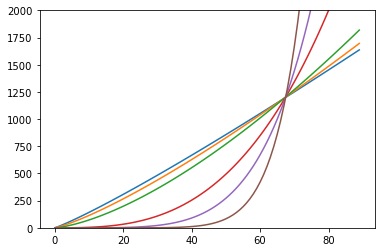

In [107]:
for n in n_range:
    plt.plot(e_range[n].cumsum())
    plt.ylim(0,2000)

In [108]:
%%time

GF = G_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type'])
conv_2degC = {}
for n in n_range:
    conv_2degC[n] = signal.convolve(np.array(GF.dropna(dim = 's')), e_range[n][..., None, None],'full')
    conv_2degC[n] = utils.np_to_xr(conv_2degC[n], GF, e_range[n])



CPU times: user 4.77 s, sys: 3.22 s, total: 7.98 s
Wall time: 8 s


In [109]:
conv_2degC_ds = xr.concat([conv_2degC[n] for n in conv_2degC.keys()], pd.Index([n for n in conv_2degC.keys()], name='polyfit'), coords='minimal')


## Specific locations

In [110]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches



In [111]:
type_color = utils.type_color

In [112]:
gmean_vline = np.abs((conv_ds.weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.28406859 2.29918139 2.33023997 2.54702844 2.77177236 2.96879734
 2.62154418]
[2.23749296 2.25946996 2.30252311 2.48547739 2.49492397 2.21775945
 2.34569381]
[1.4349825  1.44233602 1.45360189 1.49984577 1.54360549 1.59038347
 1.63466391]
[1.69297738 1.70542802 1.72488164 1.79224659 1.82324828 1.79725191
 1.7463439 ]


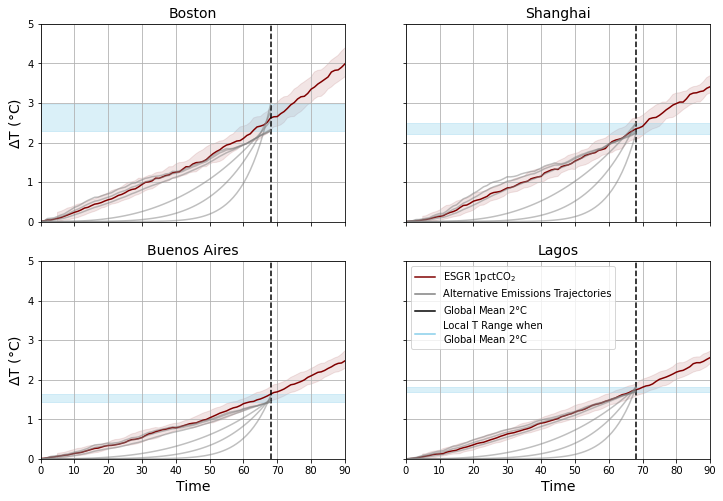

In [114]:
fig, [[ax1, ax2],[ ax3, ax4]] = plt.subplots(2,2, figsize = [12,8], sharex = True, sharey = True)

lat_lon = {'lat': 42.3, 'lon': 360-71.1}
#1pct
#ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax1, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax1, color = type_color['model'], label = ' 1pctCO$_2$')
ax1.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
ax1.set_title('Boston', fontsize = 14)
ax1.set_xlabel('', fontsize = 14)
ax1.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 14)
#local 2 degree C
# vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax1.axvline(vline,
#             linestyle = ':')
# ax1.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
#global 2 degree C
gmean_vline = np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
ax1.axvline(gmean_vline, linestyle = "--", color = 'k')
#local time when global 2 degree C
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
local_mean_spread = np.concatenate([conv_2degC_ds.sel(s = gmean_vline).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').values.reshape(6,), gmean_hline])
print(local_mean_spread)
local_max = np.max(local_mean_spread)
local_min = np.min(local_mean_spread)
ax1.axhspan(local_max, local_min, color = 'skyblue', alpha = .3)
#ax1.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':')
#similar cumulative emissions
for n in n_range:
    ax1.plot(conv_2degC_ds.sel(s = slice(0,68)).sel(polyfit = n).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest'), color = 'grey', alpha = 0.5)
plt.ylim(0,5)

lat_lon = {'lat': 31.2, 'lon': 121.5}

#ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax2, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax2, color = type_color['model'], label = ' 1pctCO$_2$')
ax2.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
plt.legend()
ax2.set_title('Shanghai', fontsize = 14)
ax2.set_xlabel('', fontsize = 14)
#local 2 degree C
# vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax2.axvline(vline,
#             linestyle = ':')
# ax2.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
#global 2 degree C
ax2.axvline(gmean_vline, linestyle = "--", color = 'k')
#local time when global 2 degree C
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
local_mean_spread = np.concatenate([conv_2degC_ds.sel(s = gmean_vline).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').values.reshape(6,), gmean_hline])
print(local_mean_spread)
local_max = np.max(local_mean_spread)
local_min = np.min(local_mean_spread)
ax2.axhspan(local_max, local_min, color = 'skyblue', alpha = .3)
#ax2.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':')
#similar cumulative emissions
for n in n_range:
    ax2.plot(conv_2degC_ds.sel(s = slice(0,68)).sel(polyfit = n).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest'), color = 'grey', alpha = 0.5)
plt.ylim(0,5)

lat_lon = {'lat': 34.6, 'lon': 360-58.4}

#ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax3, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax3, color = type_color['model'], label = ' 1pctCO$_2$')
ax3.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
ax3.set_title('Buenos Aires', fontsize = 14)
ax3.set_xlabel('Time', fontsize = 14)
ax3.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 14)
#local 2 degree C
# vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax3.axvline(vline,
#             linestyle = ':')
#ax3.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
#global 2 degree C
ax3.axvline(gmean_vline, linestyle = "--", color = 'k')
#local time when global 2 degree C
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
local_mean_spread = np.concatenate([conv_2degC_ds.sel(s = gmean_vline).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').values.reshape(6,), gmean_hline])
print(local_mean_spread)
local_max = np.max(local_mean_spread)
local_min = np.min(local_mean_spread)
ax3.axhspan(local_max, local_min, color = 'skyblue', alpha = .3)
#ax3.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':')
#similar cumulative emissions
for n in n_range:
    ax3.plot(conv_2degC_ds.sel(s = slice(0,68)).sel(polyfit = n).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest'), color = 'grey', alpha = 0.5)
plt.ylim(0,5)


lat_lon = {'lat': 6.5, 'lon': 3.4}

#ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax4, color = type_color['all'], label = '1pct Model')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax4, color = type_color['model'], label = 'ESGR 1pctCO$_2$')
ax4.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
plt.ylim(0,8)
ax4.set_title('Lagos', fontsize = 14)
ax4.set_xlabel('Time', fontsize = 14)
#local 2 degree C
# vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax4.axvline(vline,
#             linestyle = ':')
# ax4.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
#global 2 degree C
ax4.axvline(gmean_vline, linestyle = "--", color = 'k')
#local time when global 2 degree C
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
local_mean_spread = np.concatenate([conv_2degC_ds.sel(s = gmean_vline).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').values.reshape(6,), gmean_hline])
print(local_mean_spread)
local_max = np.max(local_mean_spread)
local_min = np.min(local_mean_spread)
ax4.axhspan(local_max, local_min, color = 'skyblue', alpha = .3)
#similar cumulative emissions
for n in n_range:
    ax4.plot(conv_2degC_ds.sel(s = slice(0,68)).sel(polyfit = n).sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest'), color = 'grey', alpha = 0.5)
plt.ylim(0,5)


####### legend ##########
handles, labels = plt.gca().get_legend_handles_labels()
#local_2c =  Line2D([0], [0], label='Local 2$\degree$C', color='C0')  
global_2c = Line2D([0], [0], label='Global Mean 2$\degree$C', color='k')
local_global_2c = Line2D([0], [0], label='Local T Range when\nGlobal Mean 2$\degree$C', color='skyblue')
alt_emis = Line2D([0], [0], label='Alternative Emissions Trajectories', color='grey')


handles.extend([alt_emis, global_2c,local_global_2c])

plt.legend(handles=handles)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.savefig('figures/paper/figure5_locations_time.png', bbox_inches = 'tight', dpi = 300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


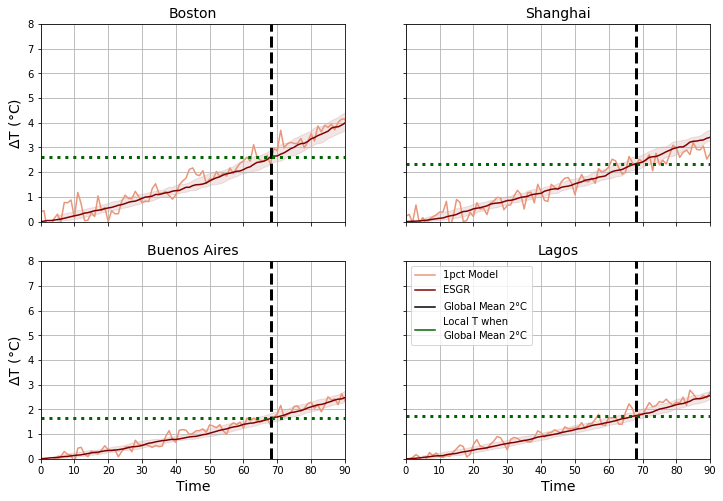

In [51]:
fig, [[ax1, ax2],[ ax3, ax4]] = plt.subplots(2,2, figsize = [12,8], sharex = True, sharey = True)

lat_lon = {'lat': 42.3, 'lon': 360-71.1}

ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax1, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax1, color = type_color['model'], label = '1pct Model')
ax1.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
ax1.set_title('Boston', fontsize = 14)
ax1.set_xlabel('', fontsize = 14)
ax1.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 14)
vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax1.axvline(vline,
#             linestyle = ':')

# ax1.axvline(np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
#     np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values,
#             linestyle = ':')
# ax1.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
gmean_vline = np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
ax1.axvline(gmean_vline, linestyle = "--", color = 'k', linewidth = 3)
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
ax1.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':', linewidth = 3)

lat_lon = {'lat': 31.2, 'lon': 121.5}

ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax2, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax2, color = type_color['model'], label = '1pct Model')
ax2.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
plt.legend()
ax2.set_title('Shanghai', fontsize = 14)
ax2.set_xlabel('', fontsize = 14)
vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax2.axvline(vline,
#             linestyle = ':')
# ax2.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
ax2.axvline(gmean_vline, linestyle = "--", color = 'k', linewidth = 3)
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
ax2.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':', linewidth = 3)

lat_lon = {'lat': 34.6, 'lon': 360-58.4}

ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax3, color = type_color['all'], label = 'Convolution')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax3, color = type_color['model'], label = '1pct Model')
ax3.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
ax3.set_title('Buenos Aires', fontsize = 14)
ax3.set_xlabel('Time', fontsize = 14)
ax3.set_ylabel('$\Delta$T ($\degree$C)', fontsize = 14)
vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax3.axvline(vline,
#             linestyle = ':')
# ax3.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
ax3.axvline(gmean_vline, linestyle = "--", color = 'k', linewidth = 3)
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
ax3.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':', linewidth = 3)


lat_lon = {'lat': 6.5, 'lon': 3.4}

ds_dif['tas'].sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').plot(ax = ax4, color = type_color['all'], label = '1pct Model')
conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').plot(ax = ax4, color = type_color['model'], label = 'ESGR')
ax4.fill_between(np.arange(0,551),conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = -5), conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').roll(s = 5), alpha = .1, color = type_color['model'])
plt.xlim(0,90)
plt.ylim(0,8)
ax4.set_title('Lagos', fontsize = 14)
ax4.set_xlabel('Time', fontsize = 14)
vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
# ax4.axvline(vline,
#             linestyle = ':')
# ax4.axvspan(vline -5, vline +5, 0,10, alpha = 0.1)
ax4.axvline(gmean_vline, linestyle = "--", color = 'k', linewidth = 3)
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = gmean_vline).values
ax4.axhline(y = gmean_hline, color = 'darkgreen', linestyle = ':', linewidth = 3)

handles, labels = plt.gca().get_legend_handles_labels()
#local_2c =  Line2D([0], [0], label='Local 2$\degree$C', color='C0')  
global_2c = Line2D([0], [0], label='Global Mean 2$\degree$C', color='k')
local_global_2c = Line2D([0], [0], label='Local T when\nGlobal Mean 2$\degree$C', color='darkgreen')

handles.extend([global_2c,local_global_2c])

plt.legend(handles=handles)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.savefig('figures/talks/figure5_locations_time.png', bbox_inches = 'tight', dpi = 300)

In [103]:
#emissions to get to a level of warming
print(emis_profile.where(ds_dif['model'].isin(model_weights.model.values), drop = True).weighted(model_weights).mean(dim = 'model').sel(year = slice(0,np.squeeze(vline))).sum('year'))


array([68])

In [102]:
gmean_vline = np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values

lat_lon = {'lat': 42.3, 'lon': 360-71.1}
vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values
gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = slice( float(gmean_vline)-5, float(gmean_vline) +5)).values

print(vline)
print(gmean_hline.mean())


lat_lon = {'lat': 31.2, 'lon': 121.5}

vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values

gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = slice( float(gmean_vline)-5, float(gmean_vline) +5)).values


print(vline)
print(gmean_hline.mean())

lat_lon = {'lat': 34.6, 'lon': 360-58.4}

vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values

gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = slice( float(gmean_vline)-5, float(gmean_vline) +5)).values

print(vline)
print(gmean_hline.mean())


lat_lon = {'lat': 6.5, 'lon': 3.4}


vline = np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).where(
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)) == 
    np.abs((conv_ds.sel(experiment = '1pct').sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(0,140))-2)).min(), drop = True)['s'].values

gmean_hline = conv_ds.sel(lat = lat_lon['lat'], lon = lat_lon['lon'], method = 'nearest').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(experiment = '1pct').sel(s = slice( float(gmean_vline)-5, float(gmean_vline) +5)).values

print(vline)
print(gmean_hline.mean())


[57]
2.580281662884828
[61]
2.341488610117486
[78]
1.6282827657692371
[75]
1.7419870332492138


## Zero emissions Commitment

In [125]:
t = 80
yr_dif = 10
(conv_ds.sel(experiment = '1000gtc').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = slice(t-yr_dif, t+yr_dif)).mean(dim = 's').weighted(A).mean(dim = ['lat','lon']) - 
conv_ds.sel(experiment = '1000gtc').weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type').sel(s = 65).weighted(A).mean(dim = ['lat','lon']))

<xarray.DataArray ()>
array(-0.01512586)
Coordinates:
    experiment  <U7 '1000gtc'
    s           int64 65

## Significance level of pattern response


In [31]:
#define our weights for models (grouping UKESM and CANESM realizations)
pictrl_model_weights = {'UKESM1_r1': 1, 'NORESM2': 1, 'GFDL': 1,
       'MIROC': 1, 'ACCESS': 1,  'CANESM5_r1p1':1/2, 'CANESM5_r1p2':1/2}
pictrl_model_weights = xr.DataArray(
    data=list(pictrl_model_weights.values()),
    dims=["model"],
    coords=dict(
        model=(["model"], list(pictrl_model_weights.keys()))
    ),
    attrs=dict(
        description="weights for models"
    ),
)
#combine our picontrol data into one dataset, normalizing the time to year 0
pictrl = {}
for m in tas_co2_pictrl.keys():    
    times = tas_co2_pictrl[m].time.get_index('time')
    weights = times.shift(-1, 'MS') - times.shift(1, 'MS')
    weights = xr.DataArray(weights, [('time', tas_co2_pictrl[m]['time'].values)]).astype('float')
    pictrl[m] =  (tas_co2_pictrl[m] * weights).groupby('time.year').sum('time')/weights.groupby('time.year').sum('time')
    pictrl[m]['year'] = pictrl[m]['year'] - pictrl[m]['year'][0] 
    
for m in pictrl.keys():
    pictrl[m] = pictrl[m].drop('height')
ds_pictrl = xr.concat([pictrl[m] for m in pictrl.keys()], pd.Index([m for m in pictrl.keys()], name='model'), coords='minimal')


In [32]:
#group the picontrol data by decade
ds_pictrl['decade'] = ((ds_pictrl['year'] - ds_pictrl['year'][0])/20).astype('int')
decadal_pictrl_ds = ds_pictrl.groupby('decade').mean(dim = 'year').sel(decade = slice(0,16))
decadal_pictrl_ds = decadal_pictrl_ds - decadal_pictrl_ds.weighted(A).mean(dim = ['lat','lon']) #create the pattern (anomaly) of temperature change

In [33]:
#create a matrix of the difference between all pictrl decadal means (15x15)
decadal_pictrl_dict = {}
for i in np.arange(0,16):
    decadal_pictrl_dict[i] = decadal_pictrl_ds['tas'].sel(decade = i) - decadal_pictrl_ds['tas'] 

In [34]:
#take the 95th percentile (abs value) to show the extreme of inter-decadal variability for each model
decadal_pictrl= xr.concat([decadal_pictrl_dict[m] for m in decadal_pictrl_dict.keys()], pd.Index([m for m in decadal_pictrl_dict.keys()], name='init_decade'), coords='minimal')
decadal_pictrl = decadal_pictrl.chunk(dict(init_decade=-1)).chunk(dict(decade=-1))
decadal_95th_pct = decadal_pictrl.quantile(0.95, dim = ['init_decade','decade'])
decadal_95th_pct = np.abs(decadal_95th_pct)

In [35]:
#change our G to units of degrees C by multiplying by the initial forcing
G_decadal_ds = G_ds * 100

#group the G data by decade
G_decadal_ds['decade'] = ((G_decadal_ds['s'] - G_decadal_ds['s'][0])/20).astype('int')
G_decadal_ds = G_decadal_ds.groupby('decade').mean(dim = 's').sel(decade = slice(0,10))
G_decadal_ds = G_decadal_ds - G_decadal_ds.mean(dim = ['lat','lon']) #create the pattern (anomaly) of temperature change

In [36]:
#create a matrix of the difference between all pictrl decadal means (15x15)
G_decadal_dict = {}
for i in np.arange(0,10):
    G_decadal_dict[i] = G_decadal_ds.sel(decade = i) - G_decadal_ds

In [37]:
#take the 95th percentile (abs value) to show the extreme of inter-decadal variability for each model
G_decadal= xr.concat([G_decadal_dict[m] for m in G_decadal_dict.keys()], pd.Index([m for m in G_decadal_dict.keys()], name='init_decade'), coords='minimal')
G_decadal = G_decadal.chunk(dict(init_decade=-1)).chunk(dict(decade=-1))
G_decadal_95th_pct = G_decadal.quantile(0.95, dim = ['init_decade','decade'])
G_decadal_95th_pct = np.abs(G_decadal_95th_pct)

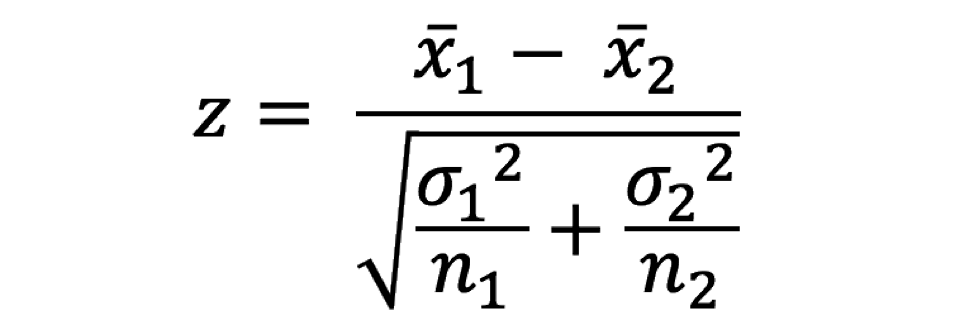

#### Test the variability in G vs. internal variability 
(if z test statistic is greater than the significance level, then the variability of G is NOT equal to that of internal variability and is significant)

In [38]:
def z_test(ds_x1, ds_x2, sig_val):
    '''selecting one model type for each ds'''
    z = (ds_x1.mean(dim = ['init_decade','decade']) - ds_x2.mean(dim = ['init_decade','decade']))/(
        np.sqrt((ds_x1.std(dim = ['init_decade','decade'])/(len(ds_x1['decade'])+len(ds_x1['init_decade']))) + 
               (ds_x2.std(dim = ['init_decade','decade'])/(len(ds_x2['decade'])+len(ds_x2['init_decade'])))))
    sig = np.abs(z).where(np.abs(z) > sig_val, drop = True)
    return(z, sig)

In [39]:
sig_val = 1.96
z = {}
sig = {}
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    z[m], sig[m] = z_test(decadal_pictrl.sel(model = m), G_decadal.mean(dim = ['pulse_type']).sel(model = m), sig_val)

<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) int64 
  * lat      (lat) float64 
    model    <U9 'UKESM1_r1'
    height   float64 dask.array<chunksize=(), meta=np.ndarray>
<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) int64 
  * lat      (lat) float64 
    model    <U5 'MIROC'
    height   float64 dask.array<chunksize=(), meta=np.ndarray>
<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) int64 
  * lat      (lat) float64 
    model    <U7 'NORESM2'
    height   float64 dask.array<chunksize=(), meta=np.ndarray>
<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon     

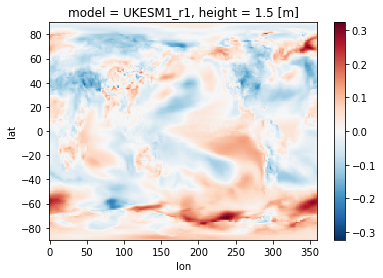

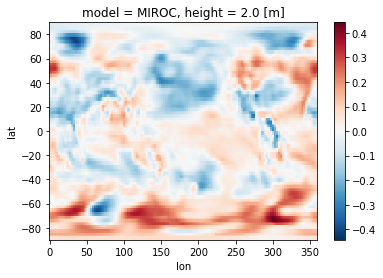

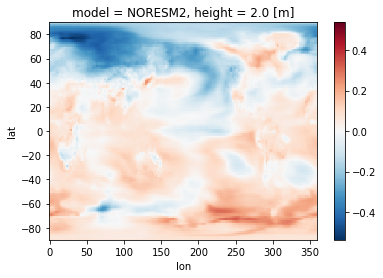

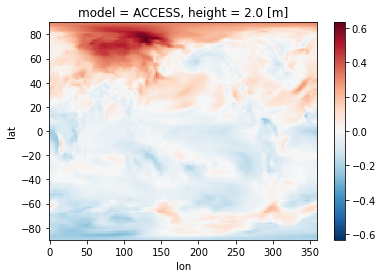

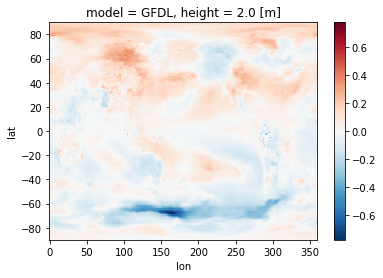

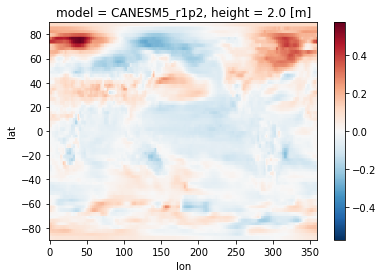

In [40]:
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    fig, ax = plt.subplots()
    z[m].plot()
    print(sig[m])

### Significance test of the pattern change of temperature in 1pct vs. internal variability

In [41]:
pattern_1pct_decadal_ds = conv_ds.sel(experiment = '1pct')
#group the 1pct temp change data by decade
pattern_1pct_decadal_ds['decade'] = ((pattern_1pct_decadal_ds['s'] - pattern_1pct_decadal_ds['s'][0])/20).astype('int')
pattern_1pct_decadal_ds = pattern_1pct_decadal_ds.groupby('decade').mean(dim = 's').sel(decade = slice(0,10))
pattern_1pct_decadal_ds = pattern_1pct_decadal_ds - pattern_1pct_decadal_ds.mean(dim = ['lat','lon']) #create the pattern (anomaly) of temperature change

In [42]:
#create a matrix of the difference between all pictrl decadal means (15x15)
pattern_1pct_decadal_dict = {}
for i in np.arange(0,10):
    pattern_1pct_decadal_dict[i] = pattern_1pct_decadal_ds.sel(decade = i) - pattern_1pct_decadal_ds

In [43]:
#take the 95th percentile (abs value) to show the extreme of inter-decadal variability for each model
pattern_1pct_decadal= xr.concat([pattern_1pct_decadal_dict[m] for m in pattern_1pct_decadal_dict.keys()], pd.Index([m for m in pattern_1pct_decadal_dict.keys()], name='init_decade'), coords='minimal')
pattern_1pct_decadal = pattern_1pct_decadal.chunk(dict(init_decade=-1)).chunk(dict(decade=-1))
pattern_1pct_decadal_95th_pct = pattern_1pct_decadal.quantile(0.95, dim = ['init_decade','decade'])
pattern_1pct_decadal_95th_pct = np.abs(pattern_1pct_decadal_95th_pct)

In [44]:
sig_val = 1.96
z_1pct = {}
sig_1pct = {}
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    z_1pct[m], sig_1pct[m] = z_test(decadal_pictrl.sel(model = m), pattern_1pct_decadal.mean(dim = ['pulse_type']).sel(model = m), sig_val)

<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon         (lon) int64 
  * lat         (lat) float64 
    model       <U9 'UKESM1_r1'
    experiment  <U4 '1pct'
<xarray.DataArray (lat: 6, lon: 22)>
dask.array<where, shape=(6, 22), dtype=float64, chunksize=(6, 22), chunktype=numpy.ndarray>
Coordinates:
  * lon         (lon) int64 260 261 262 263 264 265 ... 276 277 278 279 280 281
  * lat         (lat) float64 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5
    model       <U5 'MIROC'
    experiment  <U4 '1pct'
<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * lon         (lon) int64 
  * lat         (lat) float64 
    model       <U7 'NORESM2'
    experiment  <U4 '1pct'
<xarray.DataArray (lat: 0, lon: 0)>
dask.array<where, shape=(0, 0), dtype=float64, chunksize=(0, 0), chunktype=numpy.ndarray>
Coordinates:
  * 

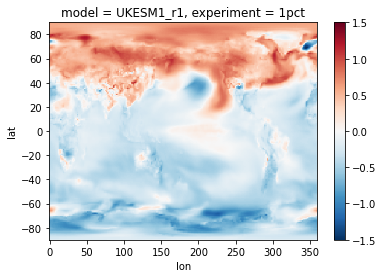

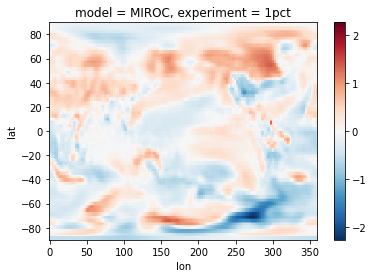

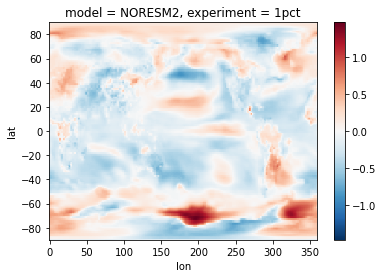

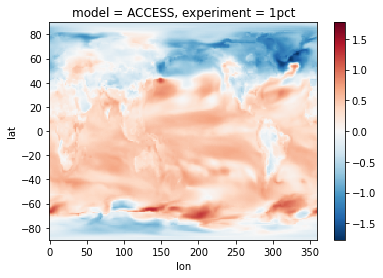

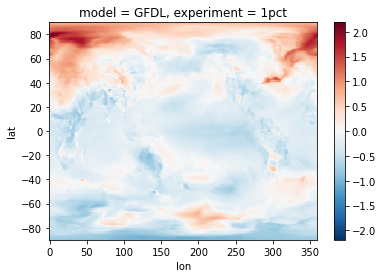

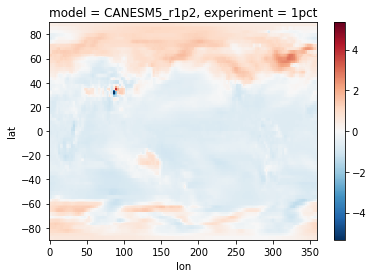

In [110]:
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    fig, ax = plt.subplots()
    z_1pct[m].plot()
    print(sig_1pct[m])

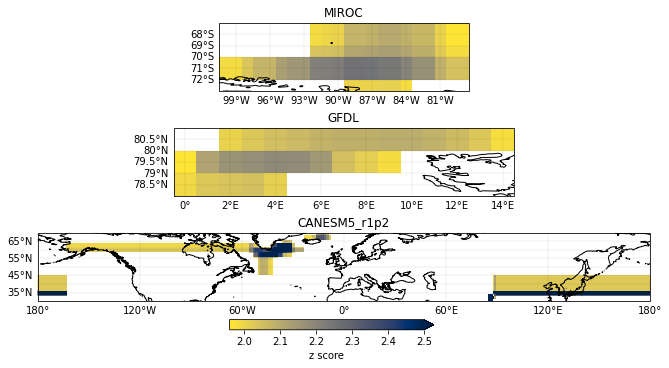

In [77]:
fig, axes = plt.subplots(3,1, subplot_kw = {'projection':ccrs.PlateCarree()}, figsize = [10,5], constrained_layout = True)
idx_range = np.arange(0,7)
idx_range = iter(idx_range)
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    if sig_1pct[m].shape > (0,0):
        idx = next(idx_range)
        ax = axes[idx]
        #z_1pct[m].plot(ax = ax, cmap = 'RdBu', transform = ccrs.PlateCarree())
        if idx == 2:
            cs = sig_1pct[m].plot(ax = ax, transform = ccrs.PlateCarree(), vmax = 2.5, vmin = 1.96, add_colorbar = True, cmap = 'cividis_r',
                                  cbar_kwargs = {'label':'z score', 'orientation':'horizontal'})
        else:
            cs = sig_1pct[m].plot(ax = ax, transform = ccrs.PlateCarree(), vmax = 2.5, vmin = 1.96, add_colorbar = False, cmap = 'cividis_r')
        ax.set_title(m)
        
        #lat lon marking
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, linewidth=0.3, color='k',alpha=0.2)
        #gl.xlocator = ticker.FixedLocator([-110, -100, -90, -80])
        #ax.set_extent(plotting.lat_lon)
        gl.right_labels = gl.top_labels = False

        #label = next(alpha_labels)
        #ax.text(x = .05, y =.05, s = label, transform=ax.transAxes, fontweight="bold", fontsize = 14)


        ax.coastlines()
        
plt.savefig('figures/paper/supp_significance.png', dpi = 350, bbox_inches = 'tight')

In [ ]:
for m in ['UKESM1_r1', 'MIROC', 'NORESM2', 'ACCESS', 'GFDL', 'CANESM5_r1p2']:
    if sig_1pct[m].shape > (0,0):
        fig, ax = plt.subplots(subplot_kw = {'projection':ccrs.PlateCarree()})
        z_1pct[m].plot(ax = ax, cmap = 'RdBu', transform = ccrs.PlateCarree())
        cs = sig_1pct[m].plot.contourf(
            ax = ax, hatches = ['xxxx', ''], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)
        ax.coastlines()

## Old pattern anomaly testing

In [87]:
dif_yr = 10
ds_dif_mean = ds_dif.where(ds_dif['model'].isin(model_weights.model), drop = True).weighted(A).mean(dim = ['lat','lon']).weighted(model_weights).mean(dim = 'model')
spatial_pattern_1pct = (((ds_dif.where(ds_dif['model'].isin(model_weights.model), drop = True).sel( s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's')-ds_dif_mean.sel( s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's'))/ds_dif_mean.sel( s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's')) - 
                        ((ds_dif.where(ds_dif['model'].isin(model_weights.model), drop = True).sel( s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's')-ds_dif_mean.sel( s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's'))/ds_dif_mean.sel( s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's'))).weighted(model_weights).mean(dim = 'model')['tas']
spatial_pattern_em = (((conv_ds.sel( s = slice(70-5, 70+5)).mean(dim = 's')-conv_mean_ds.sel( s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's'))/conv_mean_ds.sel( s = slice(70-dif_yr, 70+dif_yr))).mean(dim = 's') - 
                      ((conv_ds.sel( s = slice(10-5, 10+5)).mean(dim = 's')-conv_mean_ds.sel( s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's'))/conv_mean_ds.sel( s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's'))).weighted(model_weights).mean(dim = 'model').mean(dim = 'pulse_type')

In [80]:
#find the pattern (anomaly) of temperature change in my emulated 1pct at 100, 70, 10 years to compare

signal_100 = (G_ds.sel(s = slice(100-dif_yr, 100+dif_yr)).mean(dim = 's')- G_ds.weighted(A).mean(dim = ['lat','lon']).sel(s = slice(100-dif_yr, 100+dif_yr)).mean(dim = 's'))*100

signal_70 = (G_ds.sel(s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's')- G_ds.weighted(A).mean(dim = ['lat','lon']).sel(s = slice(70-dif_yr, 70+dif_yr)).mean(dim = 's'))*100

signal_10 = (G_ds.sel(s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's')- G_ds.weighted(A).mean(dim = ['lat','lon']).sel(s = slice(10-dif_yr, 10+dif_yr)).mean(dim = 's'))*100

dif_signal_70_10 = np.abs(signal_70 - signal_10)
dif_signal_100_10 = np.abs(signal_100 - signal_10)
#dif_signal_70_10 = np.abs(signal_70 - signal_10)

In [81]:
#find where my pattern change is significantly greater than the 95th percentile
sig_dif_70_10 = dif_signal_70_10.mean(dim = 'pulse_type') > decadal_95th_pct
sig_dif_100_10 = dif_signal_100_10.mean(dim = 'pulse_type') > decadal_95th_pct

In [82]:
proper_names = {'UKESM1_r1':'UKESM1', 'MIROC':'MIROC', 'NORESM2':'NORESM2', 'ACCESS':'ACCESS', 'GFDL':'GFDL', 'CANESM5_r1p2':'CANESM5'}

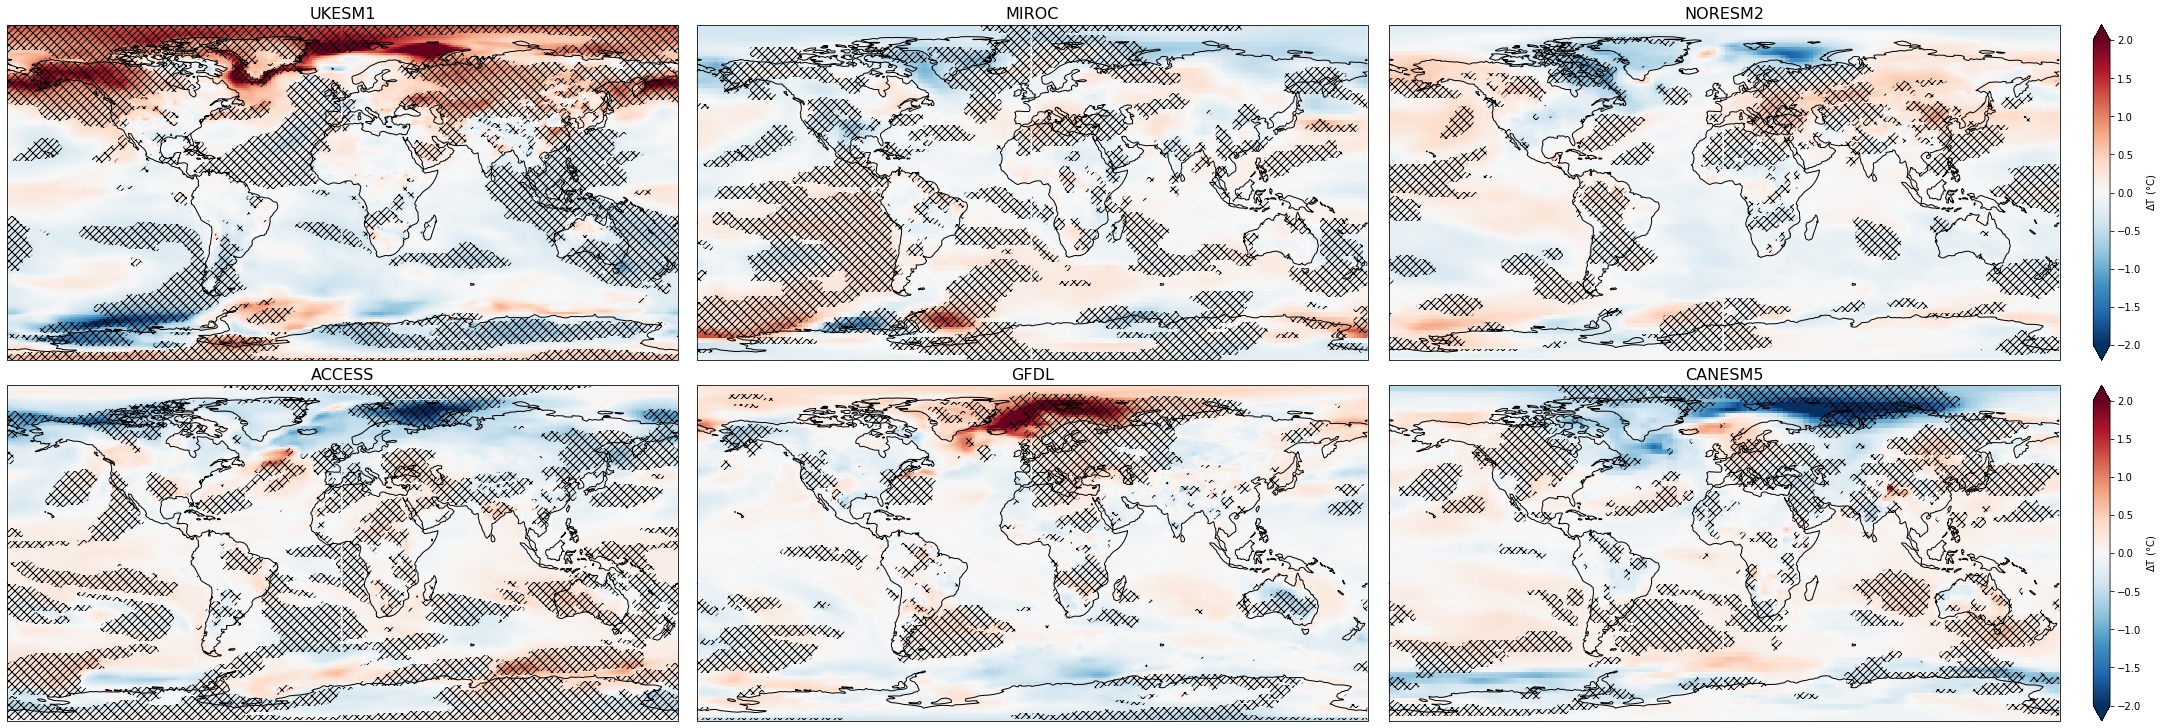

In [85]:
fig = plt.figure(figsize = [30,10], constrained_layout = True)
for idx, m in enumerate(sig_dif_70_10.model.values):
    ax = fig.add_subplot(2,3,idx+1, projection = ccrs.PlateCarree())
    if idx == 2 or idx == 5:
        cbar = True
        cbar_kwarg = {'label':'$\Delta$T ($\degree$C)'}
    else:
        cbar = False
        cbar_kwarg = None
    (signal_70 - signal_10).sel(model = m).mean(dim = 'pulse_type').plot(ax = ax, transform = ccrs.PlateCarree(), add_colorbar = cbar, cbar_kwargs = cbar_kwarg, vmin = -2, vmax = 2, cmap = 'RdBu_r', extend = 'both')
    sig_dif_70_10.sel(model = m).plot.contourf(ax = ax, hatches = ['','\\\\////'], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False) ##hatching locations where it does not exceed the 95%
    ax.set_title(proper_names[m], fontsize = 16)
    ax.coastlines()
plt.savefig('figures/paper/supp_significance_pattern.png', bbox_inches = 'tight', dpi = 350)

In [83]:
sig_dif_mean = dif_signal_70_10.weighted(model_weights).mean(dim = ['model','pulse_type']) > decadal_95th_pct

In [84]:
sig_dif_full_mean = (dif_signal_70_10.where(dif_signal_70_10['model'].isin(decadal_95th_pct.model.values), drop = True).weighted(model_weights).mean(dim = ['model','pulse_type']) > 
                        decadal_95th_pct.where(decadal_95th_pct['model'].isin(dif_signal_70_10.model.values), drop = True).weighted(model_weights).mean(['model']))

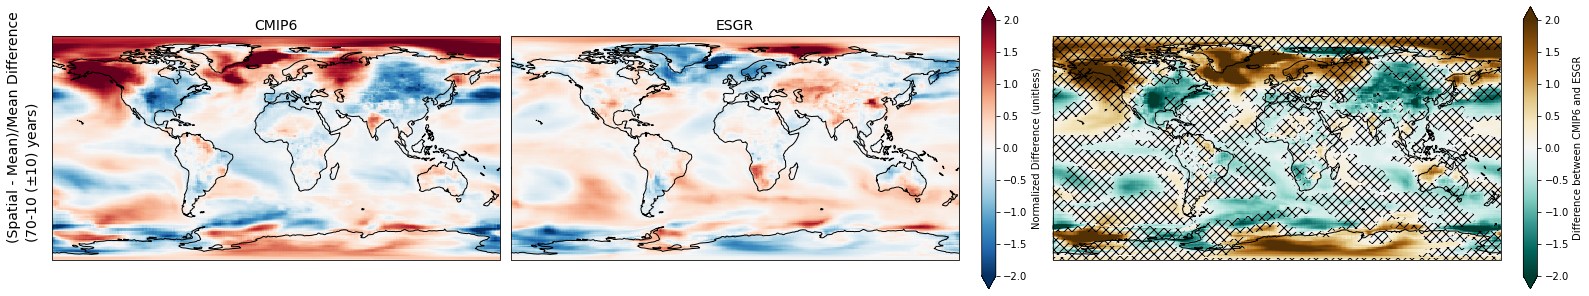

In [98]:
## FIGURE 3 FIXED
cmap = cmo.matter
levels = np.arange(0,6.25,0.25)
fig, ([ax1, ax2, ax3])= plt.subplots(1,3, figsize = [22,4], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout = True)
vmin = -2
vmax = 2
#### 1pct model ###

### spatial pattern
spatial_pattern_1pct.sel(experiment = '1pct').plot(ax = ax1, vmax = vmax, vmin = vmin, cmap = 'RdBu_r', transform = ccrs.PlateCarree(), add_colorbar = False)
ax1.coastlines()
ax1.text(x = -0.1, y = .1, s = f'(Spatial - Mean)/Mean Difference\n(70-10 ($\pm 10$) years)', rotation = 90, fontsize = 14, transform=ax1.transAxes)
ax1.set_title('CMIP6', fontsize = 14)


### Emulator ###

### spatial pattern
spatial_pattern_em.sel(experiment = '1pct').plot(ax = ax2, vmax = vmax, vmin = vmin, cmap = 'RdBu_r', transform = ccrs.PlateCarree(), cbar_kwargs = {'label':'Normalized Difference (unitless)'})
#sig_dif_full_mean.plot.contourf(ax = ax2, hatches = ['', '\\\\////'], levels = 3, colors = 'none', transform = ccrs.PlateCarree(), add_colorbar = False)

ax2.coastlines()
ax2.set_title('ESGR', fontsize = 14)

### Difference ###

### spatial pattern
(spatial_pattern_1pct - spatial_pattern_em).sel(experiment = '1pct').plot(ax = ax3, vmax = vmax, vmin = vmin, cmap = 'BrBG_r', transform = ccrs.PlateCarree(), cbar_kwargs = {'label':'Difference between CMIP6 and ESGR'})
((spatial_pattern_em.sel(experiment = '1pct') >= 0) & (spatial_pattern_1pct.sel(experiment = '1pct') >= 0) ).plot.contourf(
    ax = ax3, hatches = ['', '\\\///'], levels = 3, colors = 'none', transform = ccrs.PlateCarree(),  add_colorbar = False)

((spatial_pattern_em.sel(experiment = '1pct') <= 0) & (spatial_pattern_1pct.sel(experiment = '1pct') <= 0) ).plot.contourf(
    ax = ax3,hatches = ['', '\\\///'], levels = 3, colors = 'none', transform = ccrs.PlateCarree(),  add_colorbar = False)
ax3.coastlines()
ax3.set_title(None)


plt.savefig(f'figures/paper/figure3_TCRE_pattern_change.png', bbox_inches = 'tight', dpi = 300)

## Example trajectories

In [31]:
#https://climateactiontracker.org/global/temperatures/ for emissions trajectory

In [32]:
slow_decrease = np.concatenate([np.arange(10,30, .5), np.arange(30,0,-1)])
slow_decrease = np.concatenate([slow_decrease, np.zeros(50)])

#plt.plot(slow_decrease)

In [33]:

sudden_decrease = np.concatenate([np.arange(10,50), np.arange(50,0, -10)])
sudden_decrease = np.concatenate([sudden_decrease, np.zeros(len(slow_decrease)-len(sudden_decrease))])
#plt.plot(sudden_decrease)

In [34]:
mod_factor = np.cumsum(sudden_decrease)[-1]/np.cumsum(slow_decrease)[-1]

In [35]:
mod_factor

1.0597609561752988

In [36]:
slow_decrease[1:]*=mod_factor
#sudden_decrease[1:]*

In [37]:
sudden_decrease.sum()

1330.0

In [38]:
%%time

GF = G_ds.weighted(model_weights).mean(dim = ['model', 'pulse_type'])

conv_sudden = signal.convolve(np.array(GF.dropna(dim = 's')), np.array(sudden_decrease)[..., None, None],'full')
conv_sudden = utils.np_to_xr(conv_sudden, GF, sudden_decrease)

conv_slow = signal.convolve(np.array(GF.dropna(dim = 's')), np.array(slow_decrease)[..., None, None],'full')
conv_slow = utils.np_to_xr(conv_slow, GF, slow_decrease)


CPU times: user 2.88 s, sys: 4.83 s, total: 7.71 s
Wall time: 7.77 s


In [49]:
np.where(np.isclose((np.cumsum(sudden_decrease) - np.cumsum(slow_decrease)), (np.cumsum(sudden_decrease) - np.cumsum(slow_decrease)).max()))

(array([42]),)

In [55]:
np.where(np.isclose((np.cumsum((sudden_decrease -slow_decrease)*TCRE)), (np.cumsum((sudden_decrease -slow_decrease)*TCRE)).max()))

(array([42]),)

In [168]:
conv_sudden.weighted(A).mean(dim = ['lat','lon']).where(conv_sudden.weighted(A).mean(dim = ['lat','lon']) == conv_sudden.weighted(A).mean(dim = ['lat','lon']).max(),drop = True)

<xarray.DataArray (s: 1)>
array([2.31883119])
Coordinates:
  * s        (s) int64 44

In [61]:
np.where(np.isclose(conv_slow.weighted(A).mean(dim = ['lat','lon']), conv_slow.weighted(A).mean(dim = ['lat','lon']).max()))

(array([62, 63]),)

In [62]:
np.where(np.isclose(conv_sudden.weighted(A).mean(dim = ['lat','lon']), conv_sudden.weighted(A).mean(dim = ['lat','lon']).max()))

(array([44]),)

In [52]:
TCRE = G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = 'pulse_type').sel(s = slice(0,70)).weighted(model_weights).mean(dim = 'model').mean().values


In [53]:
TCRE

array(0.00155475)

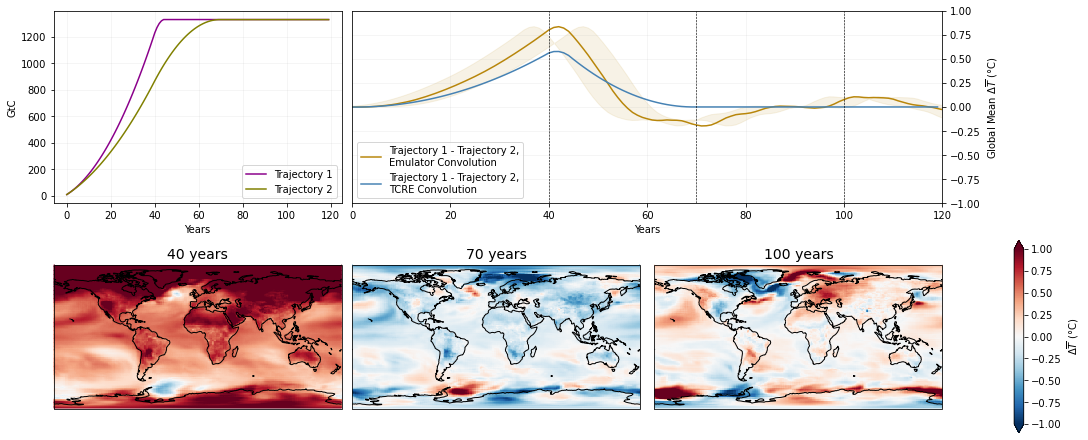

In [83]:
fig = plt.figure(figsize = [15,6], constrained_layout = True)
gs = GridSpec(2,3, figure = fig)
TCRE = G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = 'pulse_type').sel(s = slice(0,70)).weighted(model_weights).mean(dim = 'model').mean().values
####### cumulative emissions ########
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(np.cumsum(sudden_decrease), label = 'Trajectory 1', color = 'darkmagenta')
ax1.plot(np.cumsum(slow_decrease), label = 'Trajectory 2', color = 'olive')
ax1.set_ylabel('GtC')
ax1.set_xlabel('Years')
ax1.grid(alpha = 0.15)
ax1.legend()
####### global mean ############
ax2 = fig.add_subplot(gs[0,1:])
((conv_sudden-conv_slow)).mean(dim = ['lat','lon']).plot(ax = ax2, label = 'Trajectory 1 - Trajectory 2,\nEmulator Convolution', color = 'darkgoldenrod')
plt.fill_between(np.arange(0,360),((conv_sudden-conv_slow)).mean(dim = ['lat','lon']).roll(s = -5), ((conv_sudden-conv_slow)).mean(dim = ['lat','lon']).roll(s = 5), alpha = .1, color = 'darkgoldenrod')
ax2.plot(np.cumsum((sudden_decrease -slow_decrease)*TCRE), label = 'Trajectory 1 - Trajectory 2,\nTCRE Convolution', color = 'steelblue')

ax2.axvline(40, linestyle = '--', color = 'k', linewidth = .6)
ax2.axvline(70, linestyle = '--', color = 'k', linewidth = .6)
ax2.axvline(100, linestyle = '--', color = 'k', linewidth = .6)

ax2.set_xlim(0,120)
ax2.set_ylim(-1,1)
ax2.set_ylabel('Global Mean $\Delta \overline{T}$ ($\degree$C)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('Years')
ax2.grid(alpha = 0.15)
ax2.legend()
####### Maps ###########

ax3 = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
ax4 = fig.add_subplot(gs[1,1], projection = ccrs.PlateCarree())
ax5 = fig.add_subplot(gs[1,2], projection = ccrs.PlateCarree())
cbar_arg = {40:None, 70:None, 100:{'label':'$\Delta \overline{T}$ ($\degree$C)'}}
cmap = mpl.cm.RdBu_r
levels = np.arange(-2,2)
vmin = -1
vmax = 1
##contours of convolution-1pct difference
for t, ax in zip(cbar_arg.keys(),[ax3, ax4, ax5]):
    if ax == ax3 or ax == ax4:
        add_cbar = False
    elif ax == ax5:
        add_cbar = True
    (conv_sudden-conv_slow).sel(s = slice(t-5, t+5)).mean(dim = 's').plot(ax = ax, 
                                                              cmap = cmap, vmin = vmin, vmax = vmax, extend = 'both', 
                                                              add_colorbar = add_cbar, cbar_kwargs= cbar_arg[t],     
                                                              transform = ccrs.PlateCarree())

    ##hatching for locations where convolution falls within 1std
    ax.coastlines()
    ax.set_title(f'{t} years', fontsize = 14)
plt.savefig('figures/paper/figure4_example_emissions.png', dpi = 350, bbox_inches = 'tight')

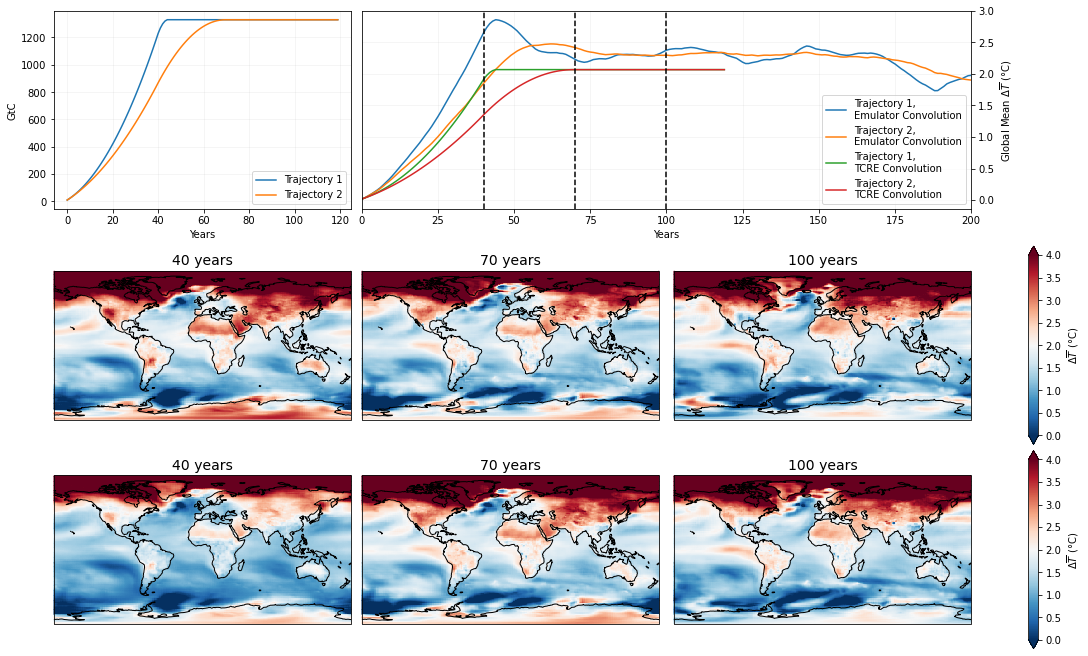

In [40]:
fig = plt.figure(figsize = [15,9], constrained_layout = True)
gs = GridSpec(3,3, figure = fig)
TCRE = G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = 'pulse_type').sel(s = slice(0,70)).weighted(model_weights).mean(dim = 'model').mean().values
####### cumulative emissions ########
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(np.cumsum(sudden_decrease), label = 'Trajectory 1')
ax1.plot(np.cumsum(slow_decrease), label = 'Trajectory 2')
ax1.set_ylabel('GtC')
ax1.set_xlabel('Years')
ax1.grid(alpha = 0.15)
ax1.legend()
####### global mean ############
ax2 = fig.add_subplot(gs[0,1:])
(conv_sudden).mean(dim = ['lat','lon']).plot(ax = ax2, label = 'Trajectory 1,\nEmulator Convolution')
(conv_slow).mean(dim = ['lat','lon']).plot(ax = ax2, label = 'Trajectory 2,\nEmulator Convolution')

ax2.plot(np.cumsum((sudden_decrease)*TCRE), label = 'Trajectory 1,\nTCRE Convolution')
ax2.plot(np.cumsum((slow_decrease)*TCRE), label = 'Trajectory 2,\nTCRE Convolution')

ax2.axvline(40, linestyle = '--', color = 'k')
ax2.axvline(70, linestyle = '--', color = 'k')
ax2.axvline(100, linestyle = '--', color = 'k')

ax2.set_xlim(0,200)
#ax2.set_ylim(-1,1)
ax2.set_ylabel('Global Mean $\Delta \overline{T}$ ($\degree$C)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('Years')
ax2.grid(alpha = 0.15)
ax2.legend()
####### Maps of trajectory 1 ###########

ax3 = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
ax4 = fig.add_subplot(gs[1,1], projection = ccrs.PlateCarree())
ax5 = fig.add_subplot(gs[1,2], projection = ccrs.PlateCarree())
cbar_arg = {40:None, 70:None, 100:{'label':'$\Delta \overline{T}$ ($\degree$C)'}}
cmap = mpl.cm.RdBu_r
levels = np.arange(-2,2)
vmin = 0
vmax = 4
##contours of convolution-1pct difference
for t, ax in zip(cbar_arg.keys(),[ax3, ax4, ax5]):
    if ax == ax3 or ax == ax4:
        add_cbar = False
    elif ax == ax5:
        add_cbar = True
    (conv_sudden).sel(s = slice(t-10, t+10)).mean(dim = 's').plot(ax = ax, 
                                                              cmap = cmap, vmin = vmin, vmax = vmax, extend = 'both', 
                                                              add_colorbar = add_cbar, cbar_kwargs= cbar_arg[t],     
                                                              transform = ccrs.PlateCarree())

    ##hatching for locations where convolution falls within 1std
    ax.coastlines()
    ax.set_title(f'{t} years', fontsize = 14)
    
####### Maps ###########

ax6 = fig.add_subplot(gs[2,0], projection = ccrs.PlateCarree())
ax7 = fig.add_subplot(gs[2,1], projection = ccrs.PlateCarree())
ax8 = fig.add_subplot(gs[2,2], projection = ccrs.PlateCarree())
cbar_arg = {40:None, 70:None, 100:{'label':'$\Delta \overline{T}$ ($\degree$C)'}}
cmap = mpl.cm.RdBu_r
levels = np.arange(-2,2)
vmin = 0
vmax = 4
##contours of convolution-1pct difference
for t, ax in zip(cbar_arg.keys(),[ax6, ax7, ax8]):
    if ax == ax6 or ax == ax7:
        add_cbar = False
    elif ax == ax8:
        add_cbar = True
    (conv_slow).sel(s = slice(t-10, t+10)).mean(dim = 's').plot(ax = ax, 
                                                              cmap = cmap, vmin = vmin, vmax = vmax, extend = 'both', 
                                                              add_colorbar = add_cbar, cbar_kwargs= cbar_arg[t],     
                                                              transform = ccrs.PlateCarree())

    ##hatching for locations where convolution falls within 1std
    ax.coastlines()
    ax.set_title(f'{t} years', fontsize = 14)

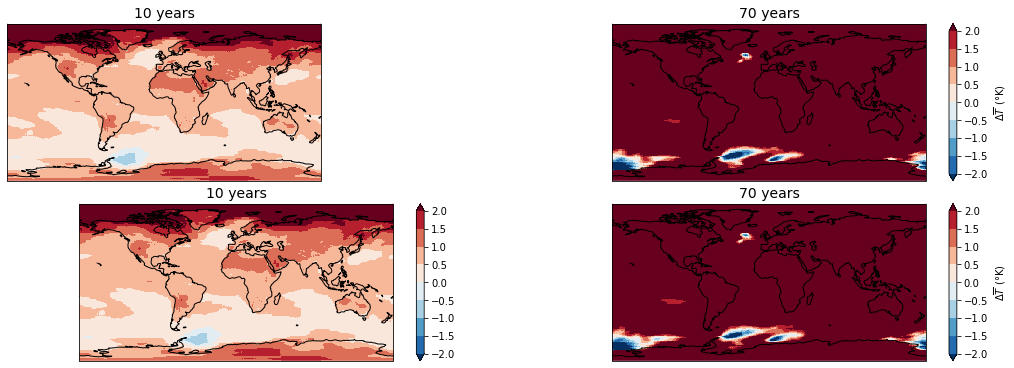

In [311]:
#hatching = ((ds_compare > minus_std) & (ds_compare < plus_std))
cbar_arg = {10:None, 70:{'label':'$\Delta \overline{T}$ ($\degree$C)'}}
cmap = mpl.cm.RdBu_r
levels = [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2.0]
vmin = -2
vmax = 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [15,5], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout = True)
##contours of convolution-1pct difference
for t, ax in zip([10,70],[ax1,ax2]):
    if ax == ax1:
        add_cbar = False
    elif ax == ax2:
        add_cbar = True
    conv_sudden.sel(s = slice(t-10, t+10)).mean(dim = 's').plot(ax = ax, 
                                                              cmap = cmap, levels = levels, extend = 'both', 
                                                              add_colorbar = add_cbar, cbar_kwargs= cbar_arg[t],     
                                                              transform = ccrs.PlateCarree())

    ##hatching for locations where convolution falls within 1std
    ax.coastlines()
    ax.set_title(f'{t} years', fontsize = 14)
    
for t, ax in zip([10,70],[ax3,ax4]):
    if ax == ax1:
        add_cbar = False
    elif ax == ax2:
        add_cbar = True
    conv_slow.sel(s = slice(t-10, t+10)).mean(dim = 's').plot(ax = ax, 
                                                              cmap = cmap, levels = levels, extend = 'both', 
                                                              add_colorbar = add_cbar, cbar_kwargs= cbar_arg[t],     
                                                              transform = ccrs.PlateCarree())

    ##hatching for locations where convolution falls within 1std
    ax.coastlines()
    ax.set_title(f'{t} years', fontsize = 14)
#plt.savefig(f'figures/paper/figure3_10_70_difference_1std.png', bbox_inches = 'tight', dpi = 300)

In [75]:
data = conv_pledge.sel(s = slice(0,140)).where(
    conv_pledge.sel(s = slice(0,140)) > 2).idxmin(dim = 's')


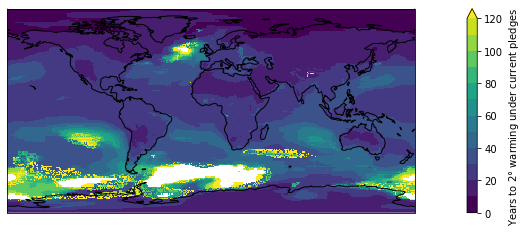

In [80]:
fig, ax1 = plt.subplots(figsize = [16,3], constrained_layout = True, subplot_kw = {'projection':ccrs.PlateCarree()})
data.plot(ax = ax1, 
        levels = np.arange(0,130,10), cmap = 'viridis', transform = ccrs.PlateCarree(), 
        cbar_kwargs = {'label':'Years to 2$\degree$ warming under current pledges'})
ax1.coastlines()